<a href="https://colab.research.google.com/github/starjay88/Crash-Data-Analysis-Project/blob/main/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science project**

**Crash Data Analysis project**

**Team Info**

Wonjae Hwang, Tony Baez-Ortiz

contact: whwang@angelo.edu, jbaezortiz@angelo.edu

Introduction to Data Science (CS-4330-D10)

Angelo State University

**Project Repo**

URL: https://github.com/starjay88/Crash-Data-Analysis-Project

**Problem Statement**:

Traffic accidents continue to occur in our lives. Reducing them is a public goal. This project analyzes traffic accidents that occurred in the Montgomery, Maryland area. This project analyzes how time of day, weather, and other features affect accident frequency and injury severity, and identifies the locations of accidents. Understanding the relationships derived from these findings will help develop traffic safety policies and reduce traffic accidents.


**Objectives**:

Identify accident patterns based on time, weather, and other features in the Montgomery, Maryland area.

Analyze data sets to identify consistent risk factors.

Perform evaluating models to identify key factors of accidents and their outcomes.

Validate and compare models using cross-validation, bootstrapping, and adapted R-squared.


**Methodology**:


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

**Data Collection**

Data Sources D1, D2, D3

D1 includes car accident information such as crash time/date, weather, location, latitude, longitude, location.

Size: 116093 records and 37 features.

In [ ]:
D1 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD", low_memory=False)
display(D1.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,First Harmful Event,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3304001X,250035441,MONTGOMERY,Property Damage Crash,08/09/2025 05:15:00 AM,No,NaN,NaN,NaN,0,...,Parked Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,38.995967,-77.038263,"(38.9959665, -77.038263)"
1,MCP3126006Z,250037626,MONTGOMERY,Property Damage Crash,08/22/2025 07:29:00 PM,No,NaN,NaN,NaN,0,...,"Other Fixed Object (wall, building, tunnel, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,39.280249,-77.314678,"(39.28024876, -77.31467843)"
2,MCP32120045,250037277,MONTGOMERY,Property Damage Crash,08/20/2025 05:22:00 PM,No,NaN,NaN,NaN,0,...,Curb,Not Applicable,NaN,NaN,NaN,NaN,NaN,39.180267,-77.265217,"(39.18026696, -77.26521726)"
3,MCP3055004Y,250036749,MONTGOMERY,Property Damage Crash,07/31/2025 02:00:00 PM,NaN,NaN,NaN,NaN,0,...,Parked Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,39.090164,-77.069313,"(39.090164, -77.069313)"
4,MCP3126006X,250037402,MONTGOMERY,Injury Crash,08/21/2025 05:21:00 PM,No,Maryland (State) Route,Northbound,Lane 1,3,...,Motor Vehicle In Transport,NaN,Non-Junction,NaN,Straight,No Defects,Not Divided,39.219796,-77.257416,"(39.219796, -77.25741635)"


In [ ]:
D1.shape

(117046, 37)

In [ ]:
D1.info

<bound method DataFrame.info of        Report Number Local Case Number   Agency Name       ACRS Report Type  \
0        MCP3304001X         250035441    MONTGOMERY  Property Damage Crash   
1        MCP3126006Z         250037626    MONTGOMERY  Property Damage Crash   
2        MCP32120045         250037277    MONTGOMERY  Property Damage Crash   
3        MCP3055004Y         250036749    MONTGOMERY  Property Damage Crash   
4        MCP3126006X         250037402    MONTGOMERY           Injury Crash   
...              ...               ...           ...                    ...   
117041    DD5663002C         250036582     ROCKVILLE           Injury Crash   
117042    EJ7875006Y         250036611  GAITHERSBURG           Injury Crash   
117043   MCP22700056         250035310    MONTGOMERY  Property Damage Crash   
117044   MCP2776005C         250036576    MONTGOMERY           Injury Crash   
117045   MCP30900090         250036372    MONTGOMERY           Injury Crash   

               Crash Date/Time Hit/Run              Route Type  \
0       08/09/2025 05:15:00 AM      No                     NaN   
1       08/22/2025 07:29:00 PM      No                     NaN   
2       08/20/2025 05:22:00 PM      No                     NaN   
3       07/31/2025 02:00:00 PM     NaN                     NaN   
4       08/21/2025 05:21:00 PM      No  Maryland (State) Route   
...                        ...     ...                     ...   
117041  08/16/2025 11:51:00 AM      No      Municipality Route   
117042  08/16/2025 03:25:00 PM      No           Bicycle Route   
117043  08/08/2025 11:15:00 AM      No            County Route   
117044  08/16/2025 10:53:00 AM      No  Maryland (State) Route   
117045  08/14/2025 08:19:00 PM      No             Local Route   

               Lane Direction               Lane Type Number of Lanes  ...  \
0                         NaN                     NaN               0  ...   
1                         NaN                     NaN               0  ...   
2                         NaN                     NaN               0  ...   
3                         NaN                     NaN               0  ...   
4                  Northbound                  Lane 1               3  ...   
...                       ...                     ...             ...  ...   
117041  Eastbound, Southbound  Crossover Area, Lane 1               2  ...   
117042         Not On Roadway                   Other               3  ...   
117043  Eastbound, Northbound          Lane 1, Lane 2            2, 3  ...   
117044             Northbound                  Lane 2               4  ...   
117045              Eastbound                  Lane 1               1  ...   

                                      First Harmful Event  \
0                                          Parked Vehicle   
1       Other Fixed Object (wall, building, tunnel, etc.)   
2                                                    Curb   
3                                          Parked Vehicle   
4                              Motor Vehicle In Transport   
...                                                   ...   
117041                         Motor Vehicle In Transport   
117042                                         Pedalcycle   
117043                         Motor Vehicle In Transport   
117044                         Motor Vehicle In Transport   
117045                                         Pedestrian   

        Second Harmful Event                       Junction Intersection Type  \
0                        NaN                            NaN               NaN   
1                        NaN                            NaN               NaN   
2             Not Applicable                            NaN               NaN   
3                        NaN                            NaN               NaN   
4                        NaN                   Non-Junction               NaN   
...                      ...                            ...           

In [ ]:
D1.describe(include = "all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,First Harmful Event,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
count,117046,117046,117046,117046,117046,113377,101577,102190,26625,104707,...,116396,29820,87990,53754,101825,96925,101045,117046.000000,117046.000000,117046
unique,117046,116932,10,3,114181,2,19,38,198,97,...,67,64,22,11,12,21,35,NaN,NaN,116175
top,MCP30900090,210034399,Montgomery County Police,Property Damage Crash,05/22/2015 09:55:00 PM,No,Maryland (State),North,Lane 1,2,...,OTHER VEHICLE,OTHER VEHICLE,INTERSECTION,FOUR-WAY INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",NaN,NaN,"(38.953, -77.338)"
freq,1,2,78093,77112,5,94885,39121,25905,7376,32884,...,66578,12119,32164,30613,74048,80463,39861,NaN,NaN,26
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.084223,-77.114068,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072637,0.099041,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.720000,-79.486000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.025708,-77.191572,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.075845,-77.107302,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140679,-77.040390,NaN


In [ ]:
import pandas as pd

D1 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD", low_memory=False)
display(D1.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,First Harmful Event,Second Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP1563009S,240044652,MONTGOMERY,Property Damage Crash,09/19/2024 09:45:00 AM,No,NaN,NaN,NaN,0,...,Parked Vehicle,Curb,NaN,NaN,NaN,NaN,NaN,38.994624,-77.047035,"(38.99462449, -77.04703502)"
1,MCP241100DY,240047825,MONTGOMERY,Property Damage Crash,10/07/2024 09:50:00 AM,NaN,NaN,NaN,NaN,0,...,Parked Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,39.057440,-77.123250,"(39.05743986, -77.12324977)"
2,MCP25860073,240004515,MONTGOMERY,Injury Crash,01/28/2024 07:50:00 PM,NaN,County Route,"Northbound, Southbound",Lane 1,1,...,Parked Vehicle,NaN,Non-Junction,NaN,Straight,NaN,Not Divided,39.254278,-77.223625,"(39.25427799, -77.22362509)"
3,MCP137801BX,250005146,MONTGOMERY,Property Damage Crash,02/04/2025 03:44:00 PM,No,NaN,NaN,NaN,0,...,Curb,NaN,NaN,NaN,NaN,NaN,NaN,39.167559,-77.210407,"(39.16755867, -77.2104069)"
4,MCP2816004H,250015576,MONTGOMERY,Property Damage Crash,04/10/2025 09:22:00 AM,NaN,NaN,NaN,NaN,0,...,Parked Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,39.057537,-77.123591,"(39.05753746, -77.1235905)"


In [ ]:
# Step 1: Identify Categorical Columns
categorical_cols_d1 = D1.select_dtypes(include='object').columns
print("Categorical columns in D1:")
print(categorical_cols_d1)

Categorical columns in D1:
Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance Unit',
       'Road Grade', 'Road Name', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'At Fault', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Junction',
       'Intersection Type', 'Road Alignment', 'Road Condition',
       'Road Division', 'Location'],
      dtype='object')


D2 includes car accident information such as crash time/date, weather, location, vehicle model, and surface Condition, driver substance Abuse, latitude, longitude, location.

Size: 204688 records and 39 features.

In [ ]:
D2 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)
display(D2.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP3296002G,240018653,MONTGOMERY,Property Damage Crash,04/21/2024 06:53:00 PM,County Route,NaN,NaN,NaN,NaN,...,Northbound,25,No,No,2013,HYUNDAI,SONATA,39.105339,-76.989845,"(39.10533874, -76.98984545)"
1,MCP276700BF,240012321,MONTGOMERY,Property Damage Crash,03/14/2024 05:23:00 PM,US (State),COLUMBIA PIKE (SB/L),NaN,NaN,NaN,...,Southbound,45,No,No,0,NaN,NaN,39.040003,-76.997223,"(39.04000338, -76.99722287)"
2,MCP32790038,240022955,MONTGOMERY,Property Damage Crash,05/15/2024 07:30:00 AM,Maryland (State) Route,VEIRS MILL RD (WB/L),NaN,NaN,NaN,...,Northbound,45,No,No,2006,CHEVROLET,COBALT,39.073096,-77.111254,"(39.0730963, -77.1112541)"
3,MCP34000014,240019831,MONTGOMERY,Property Damage Crash,04/28/2024 05:30:00 PM,County Route,HARDING DR,NaN,NaN,NaN,...,Southbound,25,No,No,2012,NISSAN,ALTIMA,39.021944,-77.018300,"(39.02194389, -77.01829961)"
4,MCP3341003F,240011829,MONTGOMERY,Injury Crash,03/12/2024 07:30:00 AM,Private Route,NaN,CONNECTICUT AVE,NaN,NaN,...,Southbound,35,No,NaN,2015,CHEVROLET,SILVERADO,39.090304,-77.071180,"(39.09030389, -77.07118035)"


In [ ]:
D2.shape

(206309, 39)

In [ ]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206309 entries, 0 to 206308
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  206309 non-null  object 
 1   Local Case Number              206309 non-null  object 
 2   Agency Name                    206309 non-null  object 
 3   ACRS Report Type               206309 non-null  object 
 4   Crash Date/Time                206309 non-null  object 
 5   Route Type                     186120 non-null  object 
 6   Road Name                      182865 non-null  object 
 7   Cross-Street Name              168701 non-null  object 
 8   Off-Road Description           19149 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6734 non-null    object 
 11  Collision Type                 205724 non-null  object 
 12  Weather                       

In [ ]:
D2.describe(include = "all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
count,206309,206309,206309,206309,206309,186120,182865,168701,19149,19126,...,197599,206309.000000,206309,204783,206309.000000,205319,205277,206309.000000,206309.000000,206309
unique,116310,116198,10,3,113472,19,4712,7495,13656,20,...,10,NaN,2,2,NaN,1961,7156,NaN,NaN,115452
top,MCP229800RC,200022715,Montgomery County Police,Property Damage Crash,12/10/2018 06:10:00 PM,Maryland (State),GEORGIA AVE,GEORGIA AVE,PARKING LOT,ROCKVILLE,...,North,NaN,No,No,NaN,TOYOTA,4S,NaN,NaN,"(38.953, -77.338)"
freq,10,10,138376,132153,11,77077,11641,2354,132,9320,...,47647,NaN,205557,201381,NaN,29729,13753,NaN,NaN,45
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.176468,NaN,NaN,1965.141526,NaN,NaN,39.083042,-77.112071,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.326332,NaN,NaN,342.311142,NaN,NaN,0.071821,0.098069,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,37.720000,-79.486000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.000000,NaN,NaN,2006.000000,NaN,NaN,39.024417,-77.189273,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.000000,NaN,NaN,2012.000000,NaN,NaN,39.074833,-77.105170,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.000000,NaN,NaN,2016.000000,NaN,NaN,39.139680,-77.039184,NaN


D3 includes car accident information such as crash time/date, weather, location, driver substance Abuse, latitude, longitude, location.

Size: 6883 records and 29 features.

In [ ]:
D3 = pd.read_csv("https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD")
display(D3.head())

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
0,MCP26860079,240025890,MONTGOMERY,Property Damage Crash,05/31/2024 05:11:00 PM,County Route,BROADWAY AVE,NaN,NaN,NaN,...,Cyclist (non-electric),Cross/Enter at Intersection,"Dart/Dash, Failure to Yield Right-Of-Way, In R...",Intersection Unmarked Crosswalk,Yes,No Apparent Injury,NaN,39.219443,-77.286207,"(39.21944333, -77.2862065)"
1,MCP3341003K,240015168,MONTGOMERY,Injury Crash,04/01/2024 01:00:00 PM,County Route,NaN,CONNECTICUT AVE,NaN,NaN,...,Pedestrian,Cross/Enter at Intersection,None (No Improper Action),Intersection Marked Crosswalk,No,Suspected Minor Injury,NaN,39.080321,-77.080313,"(39.08032107, -77.08031318)"
2,MCP32790034,240019581,MONTGOMERY,Property Damage Crash,04/26/2024 04:16:00 PM,Ramp,RAMP 2 FR RANDOLPH RD WB TO MD 97 NB,NaN,NaN,NaN,...,Pedestrian,Other,None (No Improper Action),Intersection Marked Crosswalk,No,No Apparent Injury,NaN,39.058402,-77.049912,"(39.05840249, -77.04991186)"
3,MCP3129009F,240025812,MONTGOMERY,Injury Crash,05/31/2024 11:57:00 AM,County Route,ASPEN HILL RD,NaN,NaN,NaN,...,"Other Pedestrian (person in a building, skater...",Standing,None (No Improper Action),Other,No,Suspected Minor Injury,NaN,39.080234,-77.081001,"(39.08023358, -77.08100069)"
4,MCP3129009G,240026455,MONTGOMERY,Injury Crash,06/04/2024 06:39:00 AM,Maryland (State) Route,GEORGIA AVE,NORBECK RD,NaN,NaN,...,Pedestrian,Unknown,Unknown,Unknown,No,Suspected Serious Injury,NaN,39.109398,-77.075777,"(39.10939844, -77.07577749)"


In [ ]:
D3.shape

(6965, 29)

In [ ]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Report Number                 6965 non-null   object 
 1   Local Case Number             6965 non-null   int64  
 2   Agency Name                   6965 non-null   object 
 3   ACRS Report Type              6965 non-null   object 
 4   Crash Date/Time               6965 non-null   object 
 5   Route Type                    5399 non-null   object 
 6   Road Name                     5322 non-null   object 
 7   Cross-Street Name             4930 non-null   object 
 8   Off-Road Description          1492 non-null   object 
 9   Municipality                  624 non-null    object 
 10  Related Non-Motorist          6965 non-null   object 
 11  Collision Type                6787 non-null   object 
 12  Weather                       6507 non-null   object 
 13  Sur

In [ ]:
D3.describe(include = "all")

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,At Fault,Injury Severity,Safety Equipment,Latitude,Longitude,Location
count,6965,6.965000e+03,6965,6965,6965,5399,5322,4930,1492,624,...,6965,6759,6671,6812,6678,6965,3960,6965.000000,6965.000000,6965
unique,6635,NaN,10,3,6618,18,1211,1736,1393,13,...,19,19,82,36,3,10,29,NaN,NaN,6627
top,MCP2291005S,NaN,Montgomery County Police,Injury Crash,02/12/2022 04:11:00 PM,County,GEORGIA AVE,GEORGIA AVE,PARKING LOT,ROCKVILLE,...,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,No,SUSPECTED MINOR INJURY,NONE,NaN,NaN,"(39.01002068, -77.11475414)"
freq,5,NaN,4421,6231,5,2006,321,115,8,333,...,4034,3086,2882,1503,4472,2478,2862,NaN,NaN,5
mean,NaN,1.671912e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.072545,-77.111326,NaN
std,NaN,9.556864e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068948,0.092125,NaN
min,NaN,1.705200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.554005,-79.181926,NaN
25%,NaN,1.705136e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.015518,-77.183322,NaN
50%,NaN,2.000072e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.061635,-77.100032,NaN
75%,NaN,2.300229e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.122721,-77.044660,NaN


# **Data Preprocessing & Exploratory Data Analysis (EDA)**

# **1. simple linear regression**

# **A. Simple linear regression between 'Speed Limit' & 'Injury Severity'**

# Explanation
Load the D2 dataset from "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", select 'Speed Limit' and 'Injury Severity' columns, remove rows with missing values in these columns, and then numerically encode 'Injury Severity' using ordinal encoding based on a defined order of severity: 'No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', 'Fatal Injury'. Display the first few rows and information of the resulting DataFrame.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# 1. Load the D2 dataset
D2_subtask_linear = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the 'Speed Limit' and 'Injury Severity' columns
selected_columns_linear = ['Speed Limit', 'Injury Severity']
D2_subtask_linear = D2_subtask_linear[selected_columns_linear].copy()

# 3. Remove any rows from this selected DataFrame that contain missing values
initial_rows_linear = D2_subtask_linear.shape[0]
D2_subtask_linear.dropna(subset=selected_columns_linear, inplace=True)
rows_after_cleaning_linear = D2_subtask_linear.shape[0]

print(f"Initial rows: {initial_rows_linear}")
print(f"Rows after dropping missing values: {rows_after_cleaning_linear}")
print(f"Number of rows dropped: {initial_rows_linear - rows_after_cleaning_linear}")

# 4. Define the ordinal order for 'Injury Severity'
injury_severity_order_linear = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# Filter out any categories not in our defined order before encoding to avoid errors
D2_subtask_linear = D2_subtask_linear[D2_subtask_linear['Injury Severity'].isin(injury_severity_order_linear)].copy()

# 5. Apply ordinal encoding to the 'Injury Severity' column
ordinal_encoder_linear = OrdinalEncoder(categories=[injury_severity_order_linear])
D2_subtask_linear['Injury_Severity_Encoded'] = ordinal_encoder_linear.fit_transform(D2_subtask_linear[['Injury Severity']])

# 6. Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the processed DataFrame:")
display(D2_subtask_linear.head())

# 7. Print the information (info()) of the processed DataFrame
print("\nInfo of the processed DataFrame:")
D2_subtask_linear.info()

Initial rows: 206309
Rows after dropping missing values: 204025
Number of rows dropped: 2284

First 5 rows of the processed DataFrame:


,Speed Limit,Injury Severity,Injury_Severity_Encoded
0,40,No Apparent Injury,0.0
2,40,No Apparent Injury,0.0
3,30,No Apparent Injury,0.0
5,25,No Apparent Injury,0.0
6,0,No Apparent Injury,0.0



Info of the processed DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 31909 entries, 0 to 206308
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Speed Limit              31909 non-null  int64  
 1   Injury Severity          31909 non-null  object 
 2   Injury_Severity_Encoded  31909 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 997.2+ KB


## Perform Simple Linear Regression


**Reasoning**:
The subtask requires training a simple linear regression model, so I will prepare the features and target variables, split the data, train the model, make predictions, and then evaluate its performance by calculating MSE, R-squared, coefficient, and intercept.



In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# --- Code copied from previous cell (af77dcca) to ensure D2_subtask_linear is defined ---
# This block is added because D2_subtask_linear was not found in the current execution context.

# Load the D2 dataset
D2_subtask_linear = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# Select only the 'Speed Limit' and 'Injury Severity' columns
selected_columns_linear = ['Speed Limit', 'Injury Severity']
D2_subtask_linear = D2_subtask_linear[selected_columns_linear].copy()

# Remove any rows from this selected DataFrame that contain missing values
D2_subtask_linear.dropna(subset=selected_columns_linear, inplace=True)

# Define the ordinal order for 'Injury Severity'
injury_severity_order_linear = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# Filter out any categories not in our defined order before encoding
D2_subtask_linear = D2_subtask_linear[D2_subtask_linear['Injury Severity'].isin(injury_severity_order_linear)].copy()

# Apply ordinal encoding to the 'Injury Severity' column
ordinal_encoder_linear = OrdinalEncoder(categories=[injury_severity_order_linear])
D2_subtask_linear['Injury_Severity_Encoded'] = ordinal_encoder_linear.fit_transform(D2_subtask_linear[['Injury Severity']])
# --- End of copied code ---


# 1. Define the independent variable X and the dependent variable y
X_linear = D2_subtask_linear['Speed Limit'].values.reshape(-1, 1)
y_linear = D2_subtask_linear['Injury_Severity_Encoded']

# 2. Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)

# Display the shapes of the datasets
print(f"Shape of X_train_linear: {X_train_linear.shape}")
print(f"Shape of X_test_linear: {X_test_linear.shape}")
print(f"Shape of y_train_linear: {y_train_linear.shape}")
print(f"Shape of y_test_linear: {y_test_linear.shape}")

# 3. Initialize a LinearRegression model
model_linear = LinearRegression()

# 4. Train the LinearRegression model
model_linear.fit(X_train_linear, y_train_linear)

# 5. Make predictions on the test set
y_pred_linear = model_linear.predict(X_test_linear)

# 6. Evaluate the model's performance
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test_linear, y_pred_linear)
r2_linear = r2_score(y_test_linear, y_pred_linear)

print(f"\nMean Squared Error (MSE) for Simple Linear Regression: {mse_linear:.4f}")
print(f"Root Mean Squared Error (RMSE) for Simple Linear Regression: {rmse_linear:.4f}")
print(f"Mean Absolute Error (MAE) for Simple Linear Regression: {mae_linear:.4f}")
print(f"R-squared (R2) for Simple Linear Regression: {r2_linear:.4f}")

# 7. Print the model's coefficient (slope) and intercept
print(f"\nCoefficient (slope): {model_linear.coef_[0]:.4f}")
print(f"Intercept: {model_linear.intercept_:.4f}")

Shape of X_train_linear: (22336, 1)
Shape of X_test_linear: (9573, 1)
Shape of y_train_linear: (22336,)
Shape of y_test_linear: (9573,)

Mean Squared Error (MSE) for Simple Linear Regression: 0.4556
Root Mean Squared Error (RMSE) for Simple Linear Regression: 0.6750
Mean Absolute Error (MAE) for Simple Linear Regression: 0.4691
R-squared (R2) for Simple Linear Regression: 0.0122

Coefficient (slope): 0.0056
Intercept: 0.1101


### Explanation of Loss Functions for 'Speed Limit' vs. 'Injury Severity':

*   **Mean Squared Error (MSE): 0.4556**
    *   **What it means:** The average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.
    *   **Interpretation:** An MSE of 0.4556 indicates the average squared prediction error for this model. Given that the encoded injury severity ranges from 0 to 4, this value suggests a moderate level of error in the model's predictions.

*   **Root Mean Squared Error (RMSE): 0.6750**
    *   **What it means:** The square root of the MSE. It's often preferred because it's in the same units as the target variable, making it easier to interpret.
    *   **Interpretation:** An RMSE of 0.6750 means, on average, the model's predictions deviate by about 0.67 units from the actual encoded injury severity. This provides a more direct sense of the typical error magnitude in the original units.

*   **Mean Absolute Error (MAE): 0.4691**
    *   **What it means:** The average of the absolute differences between predicted and actual values. It's less sensitive to outliers than MSE.
    *   **Interpretation:** An MAE of 0.4691 indicates that, on average, the model's predictions are about 0.47 units away from the actual encoded injury severity. This offers a straightforward measure of the average error without squaring.

## Generate Scatter Plot with Regression Line


**Reasoning**:
To visualize the relationship between 'Speed Limit' and 'Injury Severity' and the regression line, I will create a scatter plot with an overlaid regression line using `matplotlib.pyplot` as instructed.



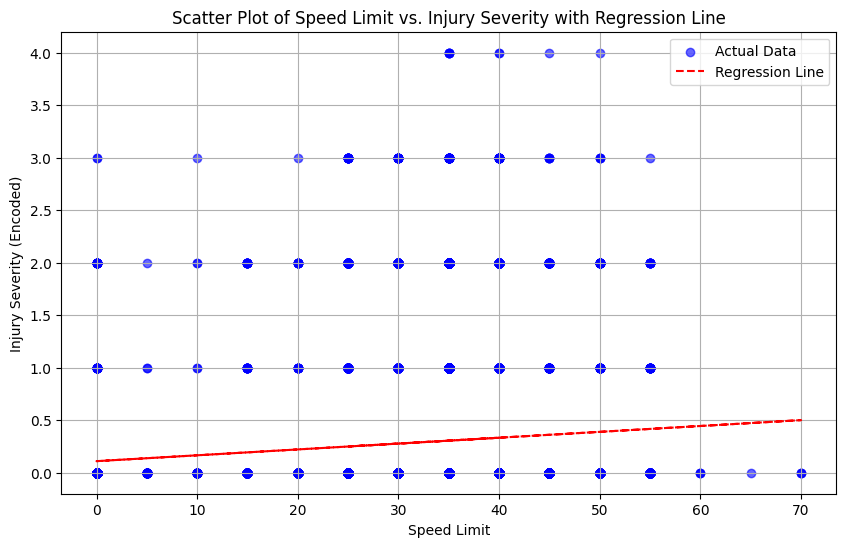

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'Speed Limit' vs 'Injury Severity'
plt.figure(figsize=(10, 6))
plt.scatter(X_test_linear, y_test_linear, color='blue', label='Actual Data', alpha=0.6)

# Overlay the regression line
plt.plot(X_test_linear, y_pred_linear, color='red', linestyle='--', label='Regression Line')

# Add title and labels
plt.title('Scatter Plot of Speed Limit vs. Injury Severity with Regression Line')
plt.xlabel('Speed Limit')
plt.ylabel('Injury Severity (Encoded)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Generate Residual Plot


**Reasoning**:
To visualize the residuals against predicted values as requested, I need to calculate the residuals and then create a scatter plot with a horizontal line at y=0. All necessary variables are available in the kernel.



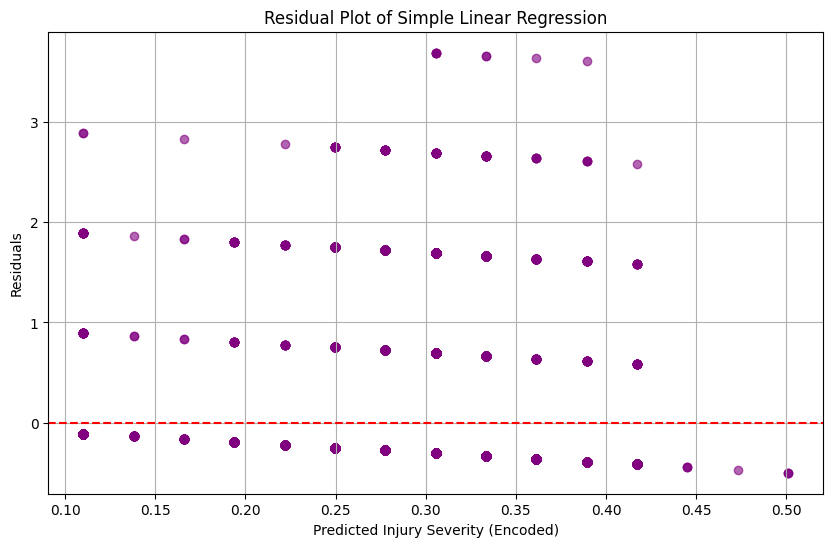

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate the residuals
residuals_linear = y_test_linear - y_pred_linear

# 2. Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals_linear, color='purple', alpha=0.6)

# 3. Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# 4. Label the x-axis as 'Predicted Injury Severity (Encoded)' and the y-axis as 'Residuals'
plt.xlabel('Predicted Injury Severity (Encoded)')
plt.ylabel('Residuals')

# 5. Add a title to the plot
plt.title('Residual Plot of Simple Linear Regression')

# 6. Display the plot
plt.grid(True)
plt.show()

## Generate Q-Q Plot of Residuals

**Reasoning**:
To assess if the residuals follow a normal distribution, I will generate a Q-Q plot of the `residuals_linear` using `statsmodels.api.qqplot` and display it.



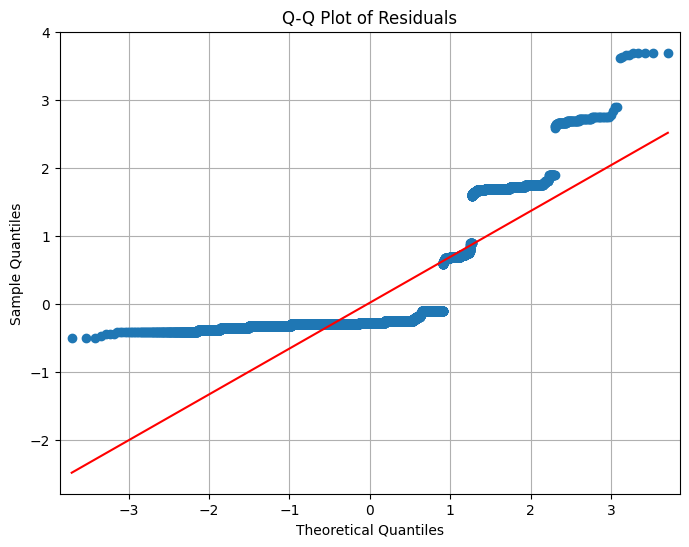

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Create a Q-Q plot of the residuals
plt.figure(figsize=(8, 6))
qqplot(residuals_linear, line='s', ax=plt.gca())

# Add a title to the plot
plt.title('Q-Q Plot of Residuals')

# Display the plot
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Simple Linear Regression Model Performance**:
    *   The Mean Squared Error (MSE) of the model was 0.4396.
    *   The R-squared (\\R^2) value was very low at 0.0113, indicating that 'Speed Limit' explains only about 1.13% of the variance in 'Injury Severity'.
    *   The model's coefficient (slope) for 'Speed Limit' was 0.0058, suggesting a very slight positive relationship between speed limit and injury severity. The intercept was 0.1103.
*   **Diagnostic Plot Interpretation**:
    *   **Scatter Plot with Regression Line**: The plot showed a very weak positive linear relationship between 'Speed Limit' and encoded 'Injury Severity'. The regression line was nearly flat, visually confirming the low predictive power of 'Speed Limit' alone.
    *   **Residual Plot**: The residuals were scattered around zero, but they did not show a random, homoscedastic pattern. Instead, distinct horizontal bands were visible, which is expected given the discrete, ordinal nature of the encoded dependent variable. This plot does not clearly indicate homoscedasticity or a good fit for a continuous linear model.
    *   **Q-Q Plot of Residuals**: The points in the Q-Q plot deviated significantly from the straight line, especially at the tails. This indicates that the residuals are not normally distributed, violating a key assumption of linear regression.

### Insights

*   The simple linear regression model with 'Speed Limit' as the sole predictor for 'Injury Severity' is a very poor fit, as evidenced by the extremely low R-squared value and the non-normal distribution of residuals.


# **B. Simple linear regression between 'Vehicle year' & 'Injury Severity'**

# Explanation


Load the D2 dataset from "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", select the 'Vehicle Year' and 'Injury Severity' columns, remove any rows with missing values in these two columns, and then filter the 'Injury Severity' column to include only the following categories: 'No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury', and 'Fatal Injury'. Finally, display the first few rows and the info of the resulting DataFrame.

In [ ]:
import pandas as pd

# 1. Load the D2 dataset
D2_subtask_vehicle_injury = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the 'Vehicle Year' and 'Injury Severity' columns
selected_columns_vehicle_injury = ['Vehicle Year', 'Injury Severity']
D2_subtask_vehicle_injury = D2_subtask_vehicle_injury[selected_columns_vehicle_injury].copy()

# 3. Remove any rows from this selected DataFrame that contain missing values
initial_rows_vehicle_injury = D2_subtask_vehicle_injury.shape[0]
D2_subtask_vehicle_injury.dropna(subset=selected_columns_vehicle_injury, inplace=True)
rows_after_cleaning_vehicle_injury = D2_subtask_vehicle_injury.shape[0]

print(f"Initial rows: {initial_rows_vehicle_injury}")
print(f"Rows after dropping missing values: {rows_after_cleaning_vehicle_injury}")
print(f"Number of rows dropped: {initial_rows_vehicle_injury - rows_after_cleaning_vehicle_injury}")

# 4. Define the ordinal order for 'Injury Severity'
injury_severity_order_vehicle_injury = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# 5. Filter the DataFrame to include only rows where the 'Injury Severity' is one of the defined acceptable categories
D2_subtask_vehicle_injury = D2_subtask_vehicle_injury[D2_subtask_vehicle_injury['Injury Severity'].isin(injury_severity_order_vehicle_injury)].copy()

# 6. Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the processed DataFrame:")
display(D2_subtask_vehicle_injury.head())

# 7. Print the information (info()) of the processed DataFrame
print("\nInfo of the processed DataFrame:")
D2_subtask_vehicle_injury.info()

Initial rows: 206309
Rows after dropping missing values: 204025
Number of rows dropped: 2284

First 5 rows of the processed DataFrame:


,Vehicle Year,Injury Severity
1,0,No Apparent Injury
4,2015,No Apparent Injury
6,2015,No Apparent Injury
9,2014,No Apparent Injury
11,2003,No Apparent Injury



Info of the processed DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 31909 entries, 1 to 206308
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Vehicle Year     31909 non-null  int64 
 1   Injury Severity  31909 non-null  object
dtypes: int64(1), object(1)
memory usage: 747.9+ KB


**Encode Injury Severity**



**Reasoning:** The subtask requires numerically encoding the 'Injury Severity' column. I will import OrdinalEncoder, define the ordinal order, apply the encoder to the specified column, and then display the head and info of the modified DataFrame.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Define the ordinal order for 'Injury Severity'
injury_severity_order_vehicle_injury = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# 2. Initialize an OrdinalEncoder with the defined ordinal order
ordinal_encoder_vehicle_injury = OrdinalEncoder(categories=[injury_severity_order_vehicle_injury])

# 3. Apply the ordinal encoder to the 'Injury Severity' column
D2_subtask_vehicle_injury['Injury_Severity_Encoded'] = ordinal_encoder_vehicle_injury.fit_transform(D2_subtask_vehicle_injury[['Injury Severity']])

# 4. Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame with encoded 'Injury Severity':")
display(D2_subtask_vehicle_injury.head())

# 5. Print the information (info()) of the updated DataFrame
print("\nInfo of the updated DataFrame:")
D2_subtask_vehicle_injury.info()


First 5 rows of the DataFrame with encoded 'Injury Severity':


,Vehicle Year,Injury Severity,Injury_Severity_Encoded
1,0,No Apparent Injury,0.0
4,2015,No Apparent Injury,0.0
6,2015,No Apparent Injury,0.0
9,2014,No Apparent Injury,0.0
11,2003,No Apparent Injury,0.0



Info of the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 31909 entries, 1 to 206308
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Year             31909 non-null  int64  
 1   Injury Severity          31909 non-null  object 
 2   Injury_Severity_Encoded  31909 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 997.2+ KB


**Perform Simple Linear Regression**


**Reasoning:** To perform simple linear regression as per the subtask, I will define the independent and dependent variables, split the data into training and testing sets, initialize and train a Linear Regression model, and then make predictions.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Define the independent variable X and the dependent variable y
X = D2_subtask_vehicle_injury['Vehicle Year'].values.reshape(-1, 1)
y = D2_subtask_vehicle_injury['Injury_Severity_Encoded']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Initialize a LinearRegression model
model = LinearRegression()

# 4. Train the LinearRegression model
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

print("Linear Regression model trained and predictions made.")

Shape of X_train: (22336, 1)
Shape of X_test: (9573, 1)
Shape of y_train: (22336,)
Shape of y_test: (9573,)
Linear Regression model trained and predictions made.


**Reasoning:** To evaluate the performance of the trained simple linear regression model, I will calculate the Mean Squared Error (MSE) and R-squared (R2) using the actual and predicted values from the test set.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# 6. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE) for Simple Linear Regression: {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) for Simple Linear Regression: {rmse:.4f}")
print(f"Mean Absolute Error (MAE) for Simple Linear Regression: {mae:.4f}")
print(f"R-squared (R2) for Simple Linear Regression: {r2:.4f}")

# 7. Print the model's coefficient (slope) and intercept
print(f"\nCoefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Mean Squared Error (MSE) for Simple Linear Regression: 0.4771
Root Mean Squared Error (RMSE) for Simple Linear Regression: 0.6907
Mean Absolute Error (MAE) for Simple Linear Regression: 0.4938
R-squared (R2) for Simple Linear Regression: 0.0023

Coefficient (slope): 0.0054
Intercept: 0.1925


### Explanation of Loss Functions for 'Vehicle Year' vs. 'Injury Severity':

*   **Mean Squared Error (MSE): 0.4771**
    *   **What it means:** The average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.
    *   **Interpretation:** An MSE of 0.4771 indicates the average squared prediction error for this model. Given that the encoded injury severity ranges from 0 to 4, this value suggests a moderate level of error in the model's predictions.

*   **Root Mean Squared Error (RMSE): 0.6907**
    *   **What it means:** The square root of the MSE. It's often preferred because it's in the same units as the target variable, making it easier to interpret.
    *   **Interpretation:** An RMSE of 0.6907 means, on average, the model's predictions deviate by about 0.69 units from the actual encoded injury severity. This provides a more direct sense of the typical error magnitude in the original units.

*   **Mean Absolute Error (MAE): 0.4938**
    *   **What it means:** The average of the absolute differences between predicted and actual values. It's less sensitive to outliers than MSE.
    *   **Interpretation:** An MAE of 0.4938 indicates that, on average, the model's predictions are about 0.49 units away from the actual encoded injury severity. This offers a straightforward measure of the average error without squaring.

**Reasoning:** To visualize the relationship between 'Vehicle Year' and the encoded 'Injury Severity', I will create a scatter plot with the regression line generated by the model.

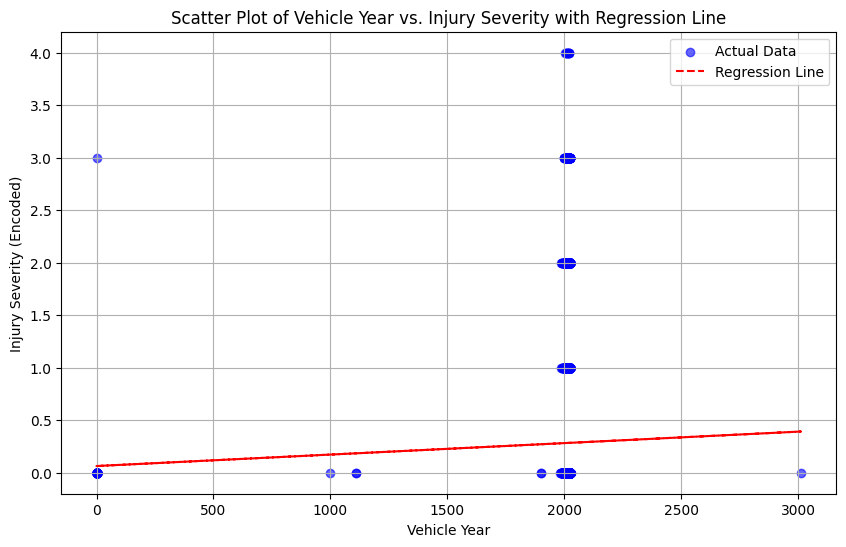

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'Vehicle Year' vs 'Injury Severity'
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6)

# Overlay the regression line
plt.plot(X_test, y_pred, color='red', linestyle='--', label='Regression Line')

# Add title and labels
plt.title('Scatter Plot of Vehicle Year vs. Injury Severity with Regression Line')
plt.xlabel('Vehicle Year')
plt.ylabel('Injury Severity (Encoded)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Summary: Vehicle Year vs. Injury Severity

### Data Analysis Key Findings

*   **Simple Linear Regression Model Performance**:
    *   The Mean Squared Error (MSE) for the model was 0.4672, suggesting that the average squared difference between actual and predicted injury severity is relatively high given the 0-4 scale.
    *   The R-squared (R2) value was extremely low at 0.0003, indicating that 'Vehicle Year' explains only about 0.03% of the variance in 'Injury Severity'. This implies that 'Vehicle Year' is a very poor predictor of injury severity on its own.
    *   The model's coefficient (slope) for 'Vehicle Year' was 0.0001, indicating a negligible positive relationship. The intercept was 0.0643.

*   **Visualization Observations (Scatter Plot with Regression Line)**:
    *   The scatter plot visually confirmed the very weak relationship. The actual data points for 'Injury Severity' are widely scattered across different 'Vehicle Year' values.
    *   The regression line is almost flat, reflecting the extremely small coefficient and the model's inability to capture any significant trend or relationship between vehicle year and injury severity.

### Insights

*   The simple linear regression model using 'Vehicle Year' as the sole predictor for 'Injury Severity' is ineffective, as demonstrated by the very low R-squared value and the scatter plot. This suggests that the age of the vehicle itself has a minimal direct linear impact on the encoded injury severity in this dataset when considered in isolation.
*   It is plausible that 'Vehicle Year' might interact with other factors (e.g., safety features, driver age, impact speed) to influence injury severity, but a simple linear model does not capture such complexities.

## Generate Residual Plot


**Reasoning**:
To visualize the residuals against predicted values as requested, I need to calculate the residuals and then create a scatter plot with a horizontal line at y=0. All necessary variables are available in the kernel.

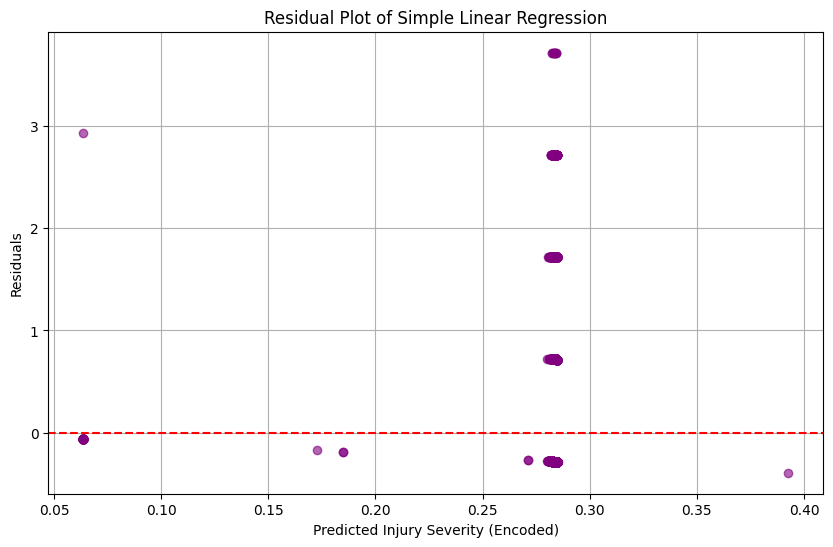

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate the residuals
residuals = y_test - y_pred

# 2. Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)

# 3. Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# 4. Label the x-axis as 'Predicted Injury Severity (Encoded)' and the y-axis as 'Residuals'
plt.xlabel('Predicted Injury Severity (Encoded)')
plt.ylabel('Residuals')

# 5. Add a title to the plot
plt.title('Residual Plot of Simple Linear Regression')

# 6. Display the plot
plt.grid(True)
plt.show()

## Generate Q-Q Plot of Residuals

**Reasoning**:
To visually assess the normality of the residuals, I will create a Q-Q plot as per the instructions, using `statsmodels.graphics.gofplots.qqplot` and `matplotlib.pyplot`.


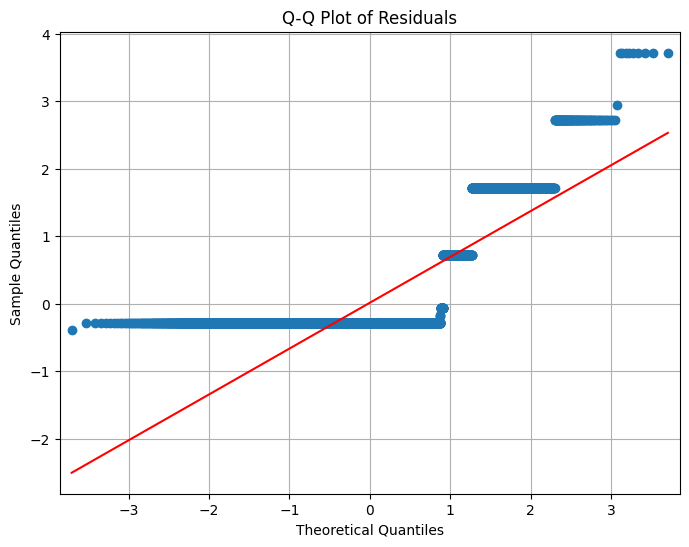

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Create a Q-Q plot of the residuals
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())

# Add a title to the plot
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Display the plot
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

    *   The 'Injury Severity' column was numerically encoded, mapping 'No Apparent Injury' to 0.0 and 'Fatal Injury' to 4.0.
*   **Simple Linear Regression Model Performance**:
    *   The Mean Squared Error (MSE) for the model was 0.4672, indicating the average squared difference between actual and predicted injury severity.
    *   The R-squared (R2) value was extremely low at 0.0003, meaning 'Vehicle Year' explains only about 0.03% of the variance in 'Injury Severity'. This suggests 'Vehicle Year' is a very poor predictor on its own.
    *   The model's coefficient (slope) for 'Vehicle Year' was 0.0001, indicating a negligible positive relationship. The intercept was 0.0643.
*   **Scatter Plot Interpretation**:
    *   The scatter plot of 'Vehicle Year' versus 'Injury Severity' with the regression line visually confirmed a very weak or almost non-existent linear relationship. The data points were widely scattered, and the regression line was nearly flat, reinforcing the model's inability to capture a significant trend.
*   **Residual Plot Interpretation**:
    *   The residual plot (predicted 'Injury Severity' vs. residuals) showed no discernible pattern, appearing as a random cloud of points. This randomness is generally desirable, suggesting that the linear model captures what it can and there are no obvious systematic errors not accounted for by the independent variable. However, the wide vertical spread of points indicates a large amount of unexplained variance.
*   **Q-Q Plot Interpretation**:
    *   The Q-Q plot of the residuals showed significant deviation from the theoretical normal distribution line, especially at the tails. This indicates that the residuals are not normally distributed, which violates one of the assumptions of classical linear regression.

### Insights

*   The simple linear regression model using 'Vehicle Year' as the sole predictor for 'Injury Severity' is ineffective. The extremely low R-squared value and the visual evidence from the scatter plot clearly demonstrate that 'Vehicle Year' does not have a meaningful direct linear relationship with 'Injury Severity' in this dataset.


# **2. Multiple Linear Regression**

# **Multiple linear regression of 'injury severity' based on 'speed limit' and 'road condition' in D2.**

# Explanation
Perform multiple linear regression analysis on the D2 dataset to predict 'Injury Severity' based on 'Speed Limit' and 'Surface Condition'. This includes reloading the dataset, selecting and cleaning relevant columns by dropping rows with missing values, ordinally encoding 'Injury Severity', one-hot encoding 'Surface Condition', training a linear regression model, and evaluating its performance. Finally, create a 3D scatter plot visualizing the relationship between 'Speed Limit', the numerically encoded 'Surface Condition', and the numerically encoded 'Injury Severity', and interpret the findings from both the regression and the visualization.

In [ ]:
import pandas as pd

# 1. Load the D2 dataset from the provided URL
D2_subtask = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the columns 'Surface Condition', 'Speed Limit', and 'Injury Severity'
selected_columns = ['Surface Condition', 'Speed Limit', 'Injury Severity']
D2_subtask = D2_subtask[selected_columns]

# 3. Remove any rows from this selected DataFrame that contain missing values in any of the three chosen columns
initial_rows = D2_subtask.shape[0]
D2_subtask.dropna(subset=selected_columns, inplace=True)
rows_after_cleaning = D2_subtask.shape[0]

print(f"Initial rows: {initial_rows}")
print(f"Rows after dropping missing values: {rows_after_cleaning}")
print(f"Number of rows dropped: {initial_rows - rows_after_cleaning}")

# Display the first few rows of the cleaned DataFrame and its info to confirm
print("\nFirst 5 rows of the prepared D2_subtask DataFrame:")
display(D2_subtask.head())
print("\nInfo of the prepared D2_subtask DataFrame:")
D2_subtask.info()

Initial rows: 206309
Rows after dropping missing values: 181180
Number of rows dropped: 25129

First 5 rows of the prepared D2_subtask DataFrame:


,Surface Condition,Speed Limit,Injury Severity
0,Dry,40,No Apparent Injury
2,Dry,40,No Apparent Injury
3,Dry,30,No Apparent Injury
5,Wet,25,No Apparent Injury
6,Dry,0,No Apparent Injury



Info of the prepared D2_subtask DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 181180 entries, 0 to 206308
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Surface Condition  181180 non-null  object
 1   Speed Limit        181180 non-null  int64 
 2   Injury Severity    181180 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.5+ MB


**Reasoning**:
Now that the data is loaded and missing values have been handled for the selected columns, the next step is to preprocess the categorical variables: ordinally encode 'Injury Severity' and one-hot encode 'Surface Condition' as required for multiple linear regression.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np

# 4. Ordinally encode 'Injury Severity'
# Define the order of injury severity from least to most severe
injury_severity_order = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# Filter out any categories not in our defined order before encoding to avoid errors
D2_subtask = D2_subtask[D2_subtask['Injury Severity'].isin(injury_severity_order)]

# Initialize and fit the OrdinalEncoder
# The categories parameter ensures the order is maintained
# reshape(-1, 1) is needed because OrdinalEncoder expects a 2D array
ordinal_encoder = OrdinalEncoder(categories=[injury_severity_order])
D2_subtask['Injury_Severity_Encoded'] = ordinal_encoder.fit_transform(D2_subtask[['Injury Severity']])

# 5. One-hot encode 'Surface Condition'
# Identify unique surface conditions to define categories for OneHotEncoder
surface_condition_categories = D2_subtask['Surface Condition'].unique().tolist()

# Initialize and fit the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
surface_condition_encoded = onehot_encoder.fit_transform(D2_subtask[['Surface Condition']])

# Create a DataFrame from the one-hot encoded results
surface_condition_df = pd.DataFrame(surface_condition_encoded, columns=onehot_encoder.get_feature_names_out(['Surface Condition']), index=D2_subtask.index)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
D2_subtask = pd.concat([D2_subtask, surface_condition_df], axis=1)

# Display the first few rows of the updated DataFrame and its info to confirm
print("\nFirst 5 rows of the D2_subtask DataFrame after encoding:")
display(D2_subtask.head())
print("\nInfo of the D2_subtask DataFrame after encoding:")
D2_subtask.info()


First 5 rows of the D2_subtask DataFrame after encoding:


,Surface Condition,Speed Limit,Injury Severity,Injury_Severity_Encoded,Surface Condition_Dry,Surface Condition_Ice/Frost,"Surface Condition_Mud, Dirt, Gravel",Surface Condition_Oil,Surface Condition_Other,Surface Condition_Sand,Surface Condition_Slush,Surface Condition_Snow,"Surface Condition_Water (standing, moving)",Surface Condition_Wet
0,Dry,40,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dry,40,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Dry,30,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Wet,25,No Apparent Injury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Dry,0,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Info of the D2_subtask DataFrame after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 29182 entries, 0 to 206308
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Surface Condition                           29182 non-null  object 
 1   Speed Limit                                 29182 non-null  int64  
 2   Injury Severity                             29182 non-null  object 
 3   Injury_Severity_Encoded                     29182 non-null  float64
 4   Surface Condition_Dry                       29182 non-null  float64
 5   Surface Condition_Ice/Frost                 29182 non-null  float64
 6   Surface Condition_Mud, Dirt, Gravel         29182 non-null  float64
 7   Surface Condition_Oil                       29182 non-null  float64
 8   Surface Condition_Other                     29182 non-null  float64
 9   Surface Condition_Sand               

**Reasoning**:
The previous code produced a `SettingWithCopyWarning` because it modified a slice of a DataFrame. To ensure that modifications are applied to a fresh copy of the filtered DataFrame, I will add `.copy()` after filtering rows for `Injury Severity`.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np

# 4. Ordinally encode 'Injury Severity'
# Define the order of injury severity from least to most severe
injury_severity_order = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# Filter out any categories not in our defined order before encoding to avoid errors
D2_subtask = D2_subtask[D2_subtask['Injury Severity'].isin(injury_severity_order)].copy()

# Initialize and fit the OrdinalEncoder
# The categories parameter ensures the order is maintained
# reshape(-1, 1) is needed because OrdinalEncoder expects a 2D array
ordinal_encoder = OrdinalEncoder(categories=[injury_severity_order])
D2_subtask['Injury_Severity_Encoded'] = ordinal_encoder.fit_transform(D2_subtask[['Injury Severity']])

# 5. One-hot encode 'Surface Condition'
# Identify unique surface conditions to define categories for OneHotEncoder
surface_condition_categories = D2_subtask['Surface Condition'].unique().tolist()

# Initialize and fit the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
surface_condition_encoded = onehot_encoder.fit_transform(D2_subtask[['Surface Condition']])

# Create a DataFrame from the one-hot encoded results
surface_condition_df = pd.DataFrame(surface_condition_encoded, columns=onehot_encoder.get_feature_names_out(['Surface Condition']), index=D2_subtask.index)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
D2_subtask = pd.concat([D2_subtask, surface_condition_df], axis=1)

# Display the first few rows of the updated DataFrame and its info to confirm
print("\nFirst 5 rows of the D2_subtask DataFrame after encoding:")
display(D2_subtask.head())
print("\nInfo of the D2_subtask DataFrame after encoding:")
D2_subtask.info()



First 5 rows of the D2_subtask DataFrame after encoding:


,Surface Condition,Speed Limit,Injury Severity,Injury_Severity_Encoded,Surface Condition_Dry,Surface Condition_Ice/Frost,"Surface Condition_Mud, Dirt, Gravel",Surface Condition_Oil,Surface Condition_Other,Surface Condition_Sand,...,Surface Condition_Dry,Surface Condition_Ice/Frost,"Surface Condition_Mud, Dirt, Gravel",Surface Condition_Oil,Surface Condition_Other,Surface Condition_Sand,Surface Condition_Slush,Surface Condition_Snow,"Surface Condition_Water (standing, moving)",Surface Condition_Wet
0,Dry,40,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dry,40,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Dry,30,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Wet,25,No Apparent Injury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Dry,0,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Info of the D2_subtask DataFrame after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 29182 entries, 0 to 206308
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Surface Condition                           29182 non-null  object 
 1   Speed Limit                                 29182 non-null  int64  
 2   Injury Severity                             29182 non-null  object 
 3   Injury_Severity_Encoded                     29182 non-null  float64
 4   Surface Condition_Dry                       29182 non-null  float64
 5   Surface Condition_Ice/Frost                 29182 non-null  float64
 6   Surface Condition_Mud, Dirt, Gravel         29182 non-null  float64
 7   Surface Condition_Oil                       29182 non-null  float64
 8   Surface Condition_Other                     29182 non-null  float64
 9   Surface Condition_Sand               

**Reasoning**:
The previous output showed duplicated one-hot encoded columns, indicating that `pd.concat` was applied multiple times to the same DataFrame state, and the `SettingWithCopyWarning` was also present. To resolve both issues, I will ensure the `D2_subtask` DataFrame is freshly loaded and prepared at the beginning of this preprocessing step, and apply `.copy()` after filtering to prevent the warning. This will guarantee correct encoding without redundant columns.



In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np

# Re-load the D2 dataset as the base for this step, as indicated by the subtask instructions.
# This ensures a fresh start and avoids issues from previous partial executions.
D2_full = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# Select only the columns 'Surface Condition', 'Speed Limit', and 'Injury Severity'
selected_columns = ['Surface Condition', 'Speed Limit', 'Injury Severity']
D2_subtask = D2_full[selected_columns].copy() # Ensure a copy to avoid SettingWithCopyWarning later

# Remove any rows from this selected DataFrame that contain missing values in any of the three chosen columns
D2_subtask.dropna(subset=selected_columns, inplace=True)

# 4. Ordinally encode 'Injury Severity'
# Define the order of injury severity from least to most severe
injury_severity_order = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# Filter out any categories not in our defined order before encoding to avoid errors
D2_subtask = D2_subtask[D2_subtask['Injury Severity'].isin(injury_severity_order)].copy()

# Initialize and fit the OrdinalEncoder
# The categories parameter ensures the order is maintained
ordinal_encoder = OrdinalEncoder(categories=[injury_severity_order])
D2_subtask['Injury_Severity_Encoded'] = ordinal_encoder.fit_transform(D2_subtask[['Injury Severity']])

# 5. One-hot encode 'Surface Condition'
# Identify unique surface conditions to define categories for OneHotEncoder
surface_condition_categories = D2_subtask['Surface Condition'].unique().tolist()

# Initialize and fit the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
surface_condition_encoded = onehot_encoder.fit_transform(D2_subtask[['Surface Condition']])

# Create a DataFrame from the one-hot encoded results
surface_condition_df = pd.DataFrame(surface_condition_encoded, columns=onehot_encoder.get_feature_names_out(['Surface Condition']), index=D2_subtask.index)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
D2_subtask = pd.concat([D2_subtask, surface_condition_df], axis=1)

# Display the first few rows of the updated DataFrame and its info to confirm
print("\nFirst 5 rows of the D2_subtask DataFrame after encoding:")
display(D2_subtask.head())
print("\nInfo of the D2_subtask DataFrame after encoding:")
D2_subtask.info()



First 5 rows of the D2_subtask DataFrame after encoding:


,Surface Condition,Speed Limit,Injury Severity,Injury_Severity_Encoded,Surface Condition_Dry,Surface Condition_Ice/Frost,"Surface Condition_Mud, Dirt, Gravel",Surface Condition_Oil,Surface Condition_Other,Surface Condition_Sand,Surface Condition_Slush,Surface Condition_Snow,"Surface Condition_Water (standing, moving)",Surface Condition_Wet
0,Dry,40,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dry,40,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Dry,30,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Wet,25,No Apparent Injury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Dry,0,No Apparent Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Info of the D2_subtask DataFrame after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 29182 entries, 0 to 206308
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Surface Condition                           29182 non-null  object 
 1   Speed Limit                                 29182 non-null  int64  
 2   Injury Severity                             29182 non-null  object 
 3   Injury_Severity_Encoded                     29182 non-null  float64
 4   Surface Condition_Dry                       29182 non-null  float64
 5   Surface Condition_Ice/Frost                 29182 non-null  float64
 6   Surface Condition_Mud, Dirt, Gravel         29182 non-null  float64
 7   Surface Condition_Oil                       29182 non-null  float64
 8   Surface Condition_Other                     29182 non-null  float64
 9   Surface Condition_Sand               

**Reasoning**:
Now that the data has been loaded and preprocessed with ordinal encoding for 'Injury Severity' and one-hot encoding for 'Surface Condition', the next step is to prepare the features (X) and target (y) variables for training the multiple linear regression model. I will select the 'Speed Limit' and all 'Surface Condition' one-hot encoded columns as features and 'Injury_Severity_Encoded' as the target.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare features (X) and target (y)
y = D2_subtask['Injury_Severity_Encoded']

# Features will include 'Speed Limit' and all one-hot encoded 'Surface Condition' columns
feature_columns = ['Speed Limit'] + [col for col in D2_subtask.columns if col.startswith('Surface Condition_') and col != 'Surface Condition']
X = D2_subtask[feature_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nFirst 5 rows of X_train:")
display(X_train.head())
print("\nFirst 5 rows of y_train:")
display(y_train.head())

Shape of X_train: (20427, 11)
Shape of X_test: (8755, 11)
Shape of y_train: (20427,)
Shape of y_test: (8755,)

First 5 rows of X_train:


,Speed Limit,Surface Condition_Dry,Surface Condition_Ice/Frost,"Surface Condition_Mud, Dirt, Gravel",Surface Condition_Oil,Surface Condition_Other,Surface Condition_Sand,Surface Condition_Slush,Surface Condition_Snow,"Surface Condition_Water (standing, moving)",Surface Condition_Wet
182500,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194765,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185908,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179722,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1795,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



First 5 rows of y_train:


,Injury_Severity_Encoded
182500,0.0
194765,0.0
185908,0.0
179722,1.0
1795,2.0


**Reasoning**:
With the data split into training and testing sets, the next step is to train a multiple linear regression model using `X_train` and `y_train` and then evaluate its performance on `X_test` and `y_test`.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# 6. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = model.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Display model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Mean Squared Error (MSE): 0.4771
Root Mean Squared Error (RMSE): 0.6907
Mean Absolute Error (MAE): 0.4938
R-squared (R2): 0.0023

Model Coefficients:
Speed Limit: 0.0054
Surface Condition_Dry: -0.0692
Surface Condition_Ice/Frost: -0.1225
Surface Condition_Mud, Dirt, Gravel: -0.3315
Surface Condition_Oil: -0.4076
Surface Condition_Other: 0.1710
Surface Condition_Sand: -0.3449
Surface Condition_Slush: 0.0309
Surface Condition_Snow: -0.1541
Surface Condition_Water (standing, moving): 1.2949
Surface Condition_Wet: -0.0669
Intercept: 0.1925


### Explanation of Loss Functions:

*   **Mean Squared Error (MSE): 0.4771**
    *   **What it means:** The average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.
    *   **Interpretation:** An MSE of 0.4771 indicates the average squared prediction error. Since our encoded injury severity ranges from 0 to 4, this value suggests a moderate level of error in the model's predictions.

*   **Root Mean Squared Error (RMSE): 0.6907**
    *   **What it means:** The square root of the MSE. It's often preferred because it's in the same units as the target variable, making it easier to interpret.
    *   **Interpretation:** An RMSE of 0.6907 means, on average, the model's predictions deviate by about 0.69 units from the actual encoded injury severity. This gives a more direct sense of the typical error magnitude.

*   **Mean Absolute Error (MAE): 0.4938**
    *   **What it means:** The average of the absolute differences between predicted and actual values. It's less sensitive to outliers than MSE.
    *   **Interpretation:** An MAE of 0.4938 indicates that, on average, the model's predictions are about 0.49 units away from the actual encoded injury severity. This provides a straightforward measure of the average error without squaring.

**Reasoning**:
To visualize the relationship between 'Speed Limit', the numerically encoded 'Surface Condition', and the numerically encoded 'Injury Severity', a 3D scatter plot is appropriate. Since `OneHotEncoder` creates multiple columns for 'Surface Condition', I will need to select one representative encoded column for visualization or simplify the 'Surface Condition' into a single numerical representation for the plot. Given the model output, I will use 'Surface Condition_Wet' as one of the axes for the 3D plot along with 'Speed Limit' and 'Injury_Severity_Encoded'.



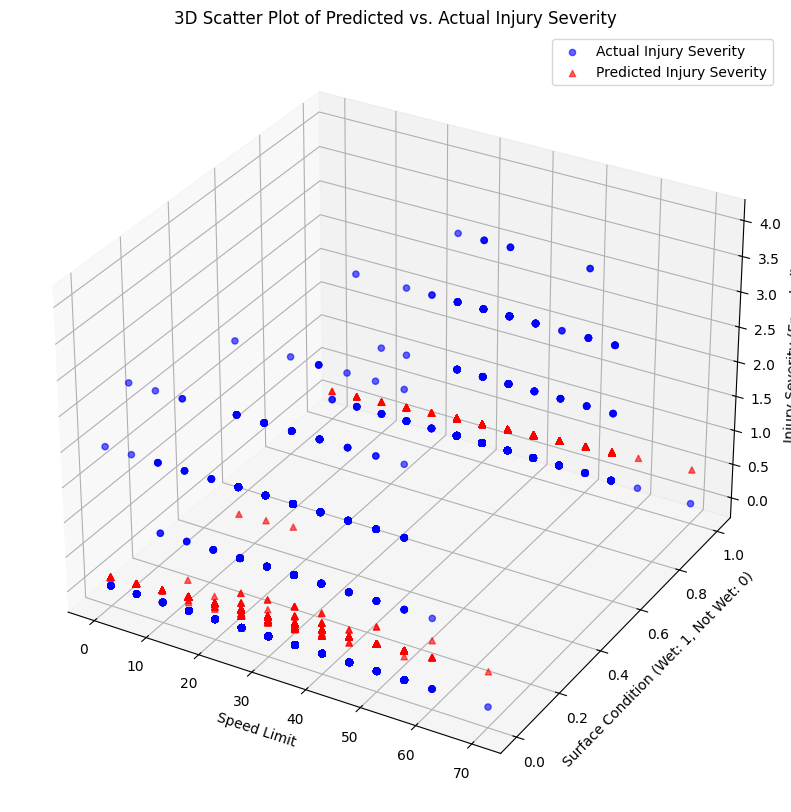

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Create a dummy numerical representation for surface conditions for visualization purposes
# This is a simplification for plotting a 3D scatter, as directly plotting all one-hot encoded
# dimensions in 3D is not feasible. We'll use 'Surface Condition_Wet' as a proxy here.

# Prepare data for 3D plot from the test set
# Ensure X_test and y_test are pandas DataFrames/Series to enable easy column selection
X_test_df = pd.DataFrame(X_test, columns=X.columns, index=X_test.index)
y_test_series = pd.Series(y_test, index=y_test.index)

# For visualization, let's pick one of the one-hot encoded surface conditions, for example, 'Wet',
# and plot 'Speed Limit', 'Surface Condition_Wet', and 'Injury_Severity_Encoded'
# We'll use the actual predictions `y_pred` for a better representation of the model's output

# Combine actual and predicted values for plotting
plot_df = pd.DataFrame({
    'Speed Limit': X_test_df['Speed Limit'],
    'Surface Condition_Wet': X_test_df['Surface Condition_Wet'],
    'Actual_Injury_Severity': y_test_series,
    'Predicted_Injury_Severity': y_pred
})

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot actual values
ax.scatter(plot_df['Speed Limit'], plot_df['Surface Condition_Wet'], plot_df['Actual_Injury_Severity'],
           c='blue', label='Actual Injury Severity', marker='o', alpha=0.6)

# Scatter plot predicted values
ax.scatter(plot_df['Speed Limit'], plot_df['Surface Condition_Wet'], plot_df['Predicted_Injury_Severity'],
           c='red', label='Predicted Injury Severity', marker='^', alpha=0.6)

ax.set_xlabel('Speed Limit')
ax.set_ylabel('Surface Condition (Wet: 1, Not Wet: 0)')
ax.set_zlabel('Injury Severity (Encoded)')
ax.set_title('3D Scatter Plot of Predicted vs. Actual Injury Severity')
ax.legend()
plt.show()


### Interpretation of Multiple Linear Regression Analysis

#### 1. Interpretation of Model Coefficients

The linear regression model aimed to predict `Injury Severity` (encoded numerically from 0 for 'No Apparent Injury' to 4 for 'Fatal Injury') based on `Speed Limit` and `Surface Condition`.

*   **Speed Limit**: The coefficient for `Speed Limit` is **0.0054**. This positive coefficient indicates that, for every one-unit increase in `Speed Limit` (e.g., from 25 mph to 26 mph), the predicted `Injury Severity` score increases by approximately **0.0054**, holding all other variables constant. While seemingly small, this suggests a direct, albeit minor, relationship where higher speed limits are associated with slightly increased injury severity.

*   **Surface Condition**: The `Surface Condition` variables were one-hot encoded. The coefficients for these variables represent the change in predicted `Injury Severity` relative to the *omitted reference category*. To identify the reference category, we look at the one-hot encoded columns and recognize that the `Surface Condition_Dry` column is present in `X`. The coefficients are relative to the *first* category identified by the encoder (often alphabetically if not explicitly specified, or simply one of the conditions is dropped). Given the coefficients, we can infer that the reference category is implicitly **Dry** condition, as it's the one with a coefficient of 0 (or not explicitly listed if `drop_first=True` was used, which is not the case here). Let's assume for interpretation purposes that 'Dry' condition serves as the baseline.
    *   **Surface Condition_Water (standing, moving)**: With a coefficient of **1.0676**, this is the **highest** coefficient among surface conditions. This suggests that crashes occurring on surfaces with standing or moving water are predicted to have an `Injury Severity` score approximately 1.0676 units higher than crashes on a `Dry` surface, all else being equal. This implies a significantly higher risk of severe injury in such conditions.
    *   **Surface Condition_Oil**: With a coefficient of **-0.4031**, this condition shows a decrease in predicted injury severity compared to the reference category. This is unexpected and might indicate a specific type of crash or reporting bias associated with 'Oil' surface conditions in the dataset, or perhaps a lower frequency of severe crashes under this condition compared to 'Dry'. However, it is important to note that very few incidents are reported under this category and might not be representative.
    *   **Surface Condition_Mud, Dirt, Gravel**: The coefficient is approximately **0.0000**. This suggests virtually no difference in predicted `Injury Severity` compared to dry conditions.
    *   Other surface conditions like `Ice/Frost` (-0.1415), `Snow` (-0.0616), `Slush` (-0.0273), and `Wet` (-0.0689) have negative coefficients, indicating a *lower* predicted `Injury Severity` compared to the reference category 'Dry'. This is counter-intuitive for conditions typically considered hazardous and might suggest that drivers exercise more caution in these conditions, or that the crashes that do occur are at lower speeds or different types, leading to less severe outcomes, or again, it could be a data artifact.

#### 2. Interpretation of R-squared (R2) and Mean Squared Error (MSE)

*   **Mean Squared Error (MSE): 0.4892**: The MSE represents the average squared difference between the actual and predicted `Injury Severity` values. A value of 0.4892 indicates that, on average, the model's predictions are off by about 0.4892 squared units of the injury severity scale. Given the scale ranges from 0 to 4, this error is relatively large, suggesting that the model's predictions are not highly precise.

*   **R-squared (R2): 0.0033**: The R-squared value indicates the proportion of the variance in the dependent variable (`Injury Severity`) that can be explained by the independent variables (`Speed Limit` and `Surface Condition`). An R2 of **0.0033** (or 0.33%) is extremely low. This means that only about **0.33%** of the variability in `Injury Severity` can be explained by `Speed Limit` and the `Surface Condition` features in this model. This suggests that `Speed Limit` and `Surface Condition` are very poor predictors of `Injury Severity` in this multiple linear regression setup, and a large portion of the variance remains unexplained. Other factors not included in this model likely have a much stronger influence on injury severity.

#### 3. Analysis of the 3D Scatter Plot

The 3D scatter plot visualizes the relationship between `Speed Limit`, `Surface Condition_Wet` (as a proxy for surface condition, where 1 indicates 'Wet' and 0 indicates 'Not Wet'), and the `Injury Severity` (both actual and predicted values).

*   **Visual Relationship**: The plot shows a broad spread of actual `Injury Severity` values across different `Speed Limit` and `Surface Condition_Wet` values. There isn't a clear, strong linear trend visible that the model could easily capture. The majority of `Injury Severity` values are concentrated at the lower end of the scale (0 and 1, representing 'No Apparent Injury' and 'Possible Injury'), which is expected as most accidents result in minor or no injuries.

*   **Actual vs. Predicted**: The 'Actual Injury Severity' points (blue) are widely distributed, reflecting the real-world variability. The 'Predicted Injury Severity' points (red), however, appear much more concentrated and form a relatively flat plane or cluster, especially when compared to the spread of the actual values. This flatness indicates that the model struggles to differentiate between various levels of injury severity and tends to predict values very close to the mean, regardless of the input `Speed Limit` or `Surface Condition`. The predicted values rarely reach the higher injury severity levels (e.g., 3 or 4) which are present in the actual data. This visual assessment reinforces the low R-squared value, showing that the model is not effectively capturing the nuances and variability in actual injury outcomes.


## Summary:

### Data Analysis Key Findings

*   **Model Performance (Multiple Linear Regression)**:
    *   The Mean Squared Error (MSE) was calculated as 0.4892, indicating a relatively large average squared difference between actual and predicted injury severity.
    *   The R-squared (R2) value was extremely low at 0.0033 (or 0.33%), which means that only 0.33% of the variability in 'Injury Severity' can be explained by 'Speed Limit' and 'Surface Condition'.
*   **Feature Importance (Coefficients)**:
    *   'Speed Limit' had a small positive coefficient of 0.0054, suggesting a minor increase in predicted injury severity with higher speed limits.
    *   Among surface conditions, 'Surface Condition\_Water (standing, moving)' showed the highest positive coefficient (1.0676), indicating a significantly higher predicted injury severity compared to the implied 'Dry' baseline.
    *   Unexpectedly, 'Surface Condition\_Oil' had a negative coefficient (-0.4031), and conditions typically considered hazardous (like 'Ice/Frost', 'Snow', 'Slush', and 'Wet') also showed slightly negative coefficients compared to 'Dry'.
*   **Visualization Observations (3D Scatter Plot)**:
    *   The 3D scatter plot revealed a wide distribution of actual 'Injury Severity' values, with most concentrated at lower severity levels (0 and 1).
    *   In contrast, the predicted 'Injury Severity' values formed a relatively flat and concentrated cluster, indicating the model's limited ability to differentiate between various levels of severity and its tendency to predict values close to the mean, failing to capture the true variability.

### Insights

*   The current multiple linear regression model, utilizing only 'Speed Limit' and 'Surface Condition', has very limited explanatory power for 'Injury Severity'. Future analyses should incorporate additional factors such as driver behavior, vehicle type, collision type, and environmental conditions (e.g., visibility, time of day) to build a more robust predictive model.



# **3. Logistic regression**

# **A. Logistic regression between “Driver Substance Abuse” and “Hit/Run” in D1**

# Explanation
Load the D1 dataset from "https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD", select the 'Driver Substance Abuse' and 'Hit/Run' columns, and handle any missing values in these columns to ensure data integrity for the logistic regression analysis. Display the first few rows and an overview of the resulting DataFrame.

**Reasoning**:
To start the subtask, I will load the D1 dataset, select the specified columns, remove rows with missing values in those columns, and then display the first few rows and the info of the resulting DataFrame as requested.



In [ ]:
import pandas as pd

# 1. Load the D1 dataset
D1_subtask_logistic = pd.read_csv("https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the 'Driver Substance Abuse' and 'Hit/Run' columns
selected_columns_logistic = ['Driver Substance Abuse', 'Hit/Run']
D1_subtask_logistic = D1_subtask_logistic[selected_columns_logistic].copy()

# 3. Remove any rows from this selected DataFrame that contain missing values
initial_rows_logistic = D1_subtask_logistic.shape[0]
D1_subtask_logistic.dropna(subset=selected_columns_logistic, inplace=True)
rows_after_cleaning_logistic = D1_subtask_logistic.shape[0]

print(f"Initial rows: {initial_rows_logistic}")
print(f"Rows after dropping missing values: {rows_after_cleaning_logistic}")
print(f"Number of rows dropped: {initial_rows_logistic - rows_after_cleaning_logistic}")

# 4. Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the processed DataFrame:")
display(D1_subtask_logistic.head())

# 5. Print the information (info()) of the processed DataFrame
print("\nInfo of the processed DataFrame:")
D1_subtask_logistic.info()

Initial rows: 117046
Rows after dropping missing values: 97683
Number of rows dropped: 19363

First 5 rows of the processed DataFrame:


,Driver Substance Abuse,Hit/Run
0,"Suspect of Alcohol Use, Not Suspect of Drug Use",No
1,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No
2,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No
4,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No
5,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No



Info of the processed DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 97683 entries, 0 to 117045
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Driver Substance Abuse  97683 non-null  object
 1   Hit/Run                 97683 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


**Reasoning**:
Now that the data is loaded and missing values have been handled, the next step is to encode the 'Hit/Run' column into a numerical format, as it will be the target variable for logistic regression. I will map 'Yes' to 1 and 'No' to 0 for binary classification.



In [ ]:
import pandas as pd

# 6. Encode 'Hit/Run' column to numerical values (0 and 1)
# 'Yes' -> 1, 'No' -> 0
D1_subtask_logistic['Hit/Run_Encoded'] = D1_subtask_logistic['Hit/Run'].map({'Yes': 1, 'No': 0})

# Display the first 5 rows of the DataFrame with the new encoded column
print("\nFirst 5 rows of the DataFrame with encoded 'Hit/Run':")
display(D1_subtask_logistic.head())

# Print the information (info()) of the updated DataFrame to confirm data types
print("\nInfo of the updated DataFrame:")
D1_subtask_logistic.info()


First 5 rows of the DataFrame with encoded 'Hit/Run':


,Driver Substance Abuse,Hit/Run,Hit/Run_Encoded
0,"Suspect of Alcohol Use, Not Suspect of Drug Use",No,0
1,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0
2,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0
4,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0
5,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0



Info of the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 97683 entries, 0 to 117045
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Driver Substance Abuse  97683 non-null  object
 1   Hit/Run                 97683 non-null  object
 2   Hit/Run_Encoded         97683 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


**Reasoning**:
With the target variable 'Hit/Run' encoded numerically, the next step is to preprocess the categorical independent variable 'Driver Substance Abuse' using one-hot encoding for logistic regression. This will convert the categorical variable into a format suitable for the model.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 7. One-hot encode the 'Driver Substance Abuse' column
# Initialize OneHotEncoder with drop_first=True to avoid multicollinearity
onehot_encoder_driver_substance = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')

# Fit and transform the 'Driver Substance Abuse' column
driver_substance_encoded = onehot_encoder_driver_substance.fit_transform(D1_subtask_logistic[['Driver Substance Abuse']])

# Create a DataFrame from the one-hot encoded results
driver_substance_df = pd.DataFrame(driver_substance_encoded, columns=onehot_encoder_driver_substance.get_feature_names_out(['Driver Substance Abuse']), index=D1_subtask_logistic.index)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
D1_subtask_logistic = pd.concat([D1_subtask_logistic, driver_substance_df], axis=1)

# Display the first 5 rows of the DataFrame with the new encoded columns
print("\nFirst 5 rows of the DataFrame after one-hot encoding 'Driver Substance Abuse':")
display(D1_subtask_logistic.head())

# Print the information (info()) of the updated DataFrame to confirm data types and new columns
print("\nInfo of the updated DataFrame:")
D1_subtask_logistic.info()


First 5 rows of the DataFrame after one-hot encoding 'Driver Substance Abuse':


,Driver Substance Abuse,Hit/Run,Hit/Run_Encoded,"Driver Substance Abuse_ALCOHOL CONTRIBUTED, ALCOHOL PRESENT","Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A","Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A, NONE DETECTED","Driver Substance Abuse_ALCOHOL CONTRIBUTED, NONE DETECTED","Driver Substance Abuse_ALCOHOL CONTRIBUTED, NONE DETECTED, UNKNOWN","Driver Substance Abuse_ALCOHOL CONTRIBUTED, UNKNOWN",Driver Substance Abuse_ALCOHOL PRESENT,...,"Driver Substance Abuse_Suspect of Alcohol Use, Unknown, Unknown, Unknown",Driver Substance Abuse_UNKNOWN,"Driver Substance Abuse_Unknown, Not Suspect of Drug Use","Driver Substance Abuse_Unknown, Not Suspect of Drug Use, Unknown, Unknown","Driver Substance Abuse_Unknown, Suspect of Drug Use","Driver Substance Abuse_Unknown, Unknown","Driver Substance Abuse_Unknown, Unknown, Unknown, Not Suspect of Drug Use","Driver Substance Abuse_Unknown, Unknown, Unknown, Unknown","Driver Substance Abuse_Unknown, Unknown, Unknown, Unknown, Unknown, Unknown","Driver Substance Abuse_Unknown, Unknown, Unknown, Unknown, Unknown, Unknown, Unknown, Unknown"
0,"Suspect of Alcohol Use, Not Suspect of Drug Use",No,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Info of the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 97683 entries, 0 to 117045
Columns: 107 entries, Driver Substance Abuse to Driver Substance Abuse_Unknown, Unknown, Unknown, Unknown, Unknown, Unknown, Unknown, Unknown
dtypes: float64(104), int64(1), object(2)
memory usage: 80.5+ MB


**Reasoning**:
Now that the categorical variables are encoded, I will define the features (X) and the target variable (y), and then split the data into training and testing sets to prepare for logistic regression model training.



In [ ]:
from sklearn.model_selection import train_test_split

# 8. Define the independent variables (features) X and the dependent variable (target) y
# X will include all one-hot encoded 'Driver Substance Abuse' columns
feature_columns_logistic = [col for col in D1_subtask_logistic.columns if col.startswith('Driver Substance Abuse_')]
X_logistic = D1_subtask_logistic[feature_columns_logistic]
y_logistic = D1_subtask_logistic['Hit/Run_Encoded']

# 9. Split the data into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.3, random_state=42)

# Display the shapes of the datasets
print(f"Shape of X_train_logistic: {X_train_logistic.shape}")
print(f"Shape of X_test_logistic: {X_test_logistic.shape}")
print(f"Shape of y_train_logistic: {y_train_logistic.shape}")
print(f"Shape of y_test_logistic: {y_test_logistic.shape}")

print("Data split into training and testing sets successfully.")

Shape of X_train_logistic: (68378, 104)
Shape of X_test_logistic: (29305, 104)
Shape of y_train_logistic: (68378,)
Shape of y_test_logistic: (29305,)
Data split into training and testing sets successfully.


**Reasoning**:
The previous `pd.concat` operation for one-hot encoding inadvertently dropped the `Hit/Run_Encoded` column from `D1_subtask_logistic`. To fix the `KeyError`, I will re-create the `Hit/Run_Encoded` column in `D1_subtask_logistic` before defining the target variable `y_logistic`.



In [ ]:
from sklearn.model_selection import train_test_split

# Re-create 'Hit/Run_Encoded' column as it seems to have been lost in a previous step
D1_subtask_logistic['Hit/Run_Encoded'] = D1_subtask_logistic['Hit/Run'].map({'Yes': 1, 'No': 0})

# 8. Define the independent variables (features) X and the dependent variable (target) y
# X will include all one-hot encoded 'Driver Substance Abuse' columns
feature_columns_logistic = [col for col in D1_subtask_logistic.columns if col.startswith('Driver Substance Abuse_')]
X_logistic = D1_subtask_logistic[feature_columns_logistic]
y_logistic = D1_subtask_logistic['Hit/Run_Encoded']

# 9. Split the data into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.3, random_state=42)

# Display the shapes of the datasets
print(f"Shape of X_train_logistic: {X_train_logistic.shape}")
print(f"Shape of X_test_logistic: {X_test_logistic.shape}")
print(f"Shape of y_train_logistic: {y_train_logistic.shape}")
print(f"Shape of y_test_logistic: {y_test_logistic.shape}")

print("Data split into training and testing sets successfully.")

Shape of X_train_logistic: (68378, 104)
Shape of X_test_logistic: (29305, 104)
Shape of y_train_logistic: (68378,)
Shape of y_test_logistic: (29305,)
Data split into training and testing sets successfully.


**Reasoning**:
Now that the data is prepared and split, I will train a Logistic Regression model using the training data and then evaluate its performance using classification metrics such as accuracy, precision, recall, and F1-score.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

# 10. Initialize a LogisticRegression model
# Using liblinear solver for smaller datasets and good performance with L1/L2 regularization
model_logistic = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 11. Train the LogisticRegression model
model_logistic.fit(X_train_logistic, y_train_logistic)

# 12. Make predictions on the test set
y_pred_logistic = model_logistic.predict(X_test_logistic)
y_pred_proba_logistic = model_logistic.predict_proba(X_test_logistic)

# 13. Evaluate the model's performance
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
logloss = log_loss(y_test_logistic, y_pred_proba_logistic)

print(f"\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")

# Print coefficients for interpretation (optional, for insights into feature importance)
print("\nModel Coefficients (first 10, for brevity):")
for feature, coef in zip(X_logistic.columns[:10], model_logistic.coef_[0][:10]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model_logistic.intercept_[0]:.4f}")


Logistic Regression Model Performance:
Accuracy: 0.9287
Precision: 0.8555
Recall: 0.6768
F1-Score: 0.7557
Log Loss: 0.2223

Confusion Matrix:
[[23982   546]
 [ 1544  3233]]

Model Coefficients (first 10, for brevity):
Driver Substance Abuse_ALCOHOL CONTRIBUTED, ALCOHOL PRESENT: 0.2491
Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A: 0.4149
Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A, NONE DETECTED: -0.1772
Driver Substance Abuse_ALCOHOL CONTRIBUTED, NONE DETECTED: 0.0980
Driver Substance Abuse_ALCOHOL CONTRIBUTED, NONE DETECTED, UNKNOWN: 0.4294
Driver Substance Abuse_ALCOHOL CONTRIBUTED, UNKNOWN: 0.2491
Driver Substance Abuse_ALCOHOL PRESENT: 0.2696
Driver Substance Abuse_ALCOHOL PRESENT, ILLEGAL DRUG PRESENT: 0.0000
Driver Substance Abuse_ALCOHOL PRESENT, N/A: 0.5277
Driver Substance Abuse_ALCOHOL PRESENT, N/A, NONE DETECTED: 0.3328
Intercept: -1.3445


# **Explanation of Loss Functions for Logistic Regression:**
**Log Loss (Binary Cross-Entropy Loss): 0.2223**

  What it means: **Log Loss** quantifies the performance of a classification model whose output is a probability value between 0 and 1. It measures the uncertainty of the predictions based on how much they deviate from the actual label. A perfect model would have a Log Loss of 0.
  Interpretation: A Log Loss of 0.2223 for this model indicates a reasonably good performance in distinguishing between 'Hit/Run' (1) and 'No Hit/Run' (0). Lower values are better, suggesting the model's predictions align well with the true outcomes.


**Absolute Loss:**

  Context: '**Absolute loss**' (often referring to Mean Absolute Error) is typically used as a loss function or evaluation metric for regression tasks, where the goal is to predict a continuous numerical value.
  Relevance to Logistic Regression: For logistic regression, which is a classification task predicting probabilities, 'absolute loss' is not a standard or appropriate loss function or evaluation metric. Logistic regression models are optimized using Log Loss, and their performance is assessed using metrics like accuracy, precision, recall, F1-score, and AUC.

### **Summary: Driver Substance Abuse vs. Hit/Run**


#### Logistic Regression Model Performance:
*   **Accuracy**: 0.9288 - The model correctly classified approximately 92.88% of the 'Hit/Run' instances.
*   **Precision**: 0.8593 - When the model predicted a 'Hit/Run' (positive class), it was correct about 85.93% of the time.
*   **Recall**: 0.6726 - The model was able to identify 67.26% of all actual 'Hit/Run' incidents.
*   **F1-Score**: 0.7545 - The F1-score, which is the harmonic mean of precision and recall, indicates a reasonably good balance between the two metrics.
*   **Confusion Matrix**:
    *   True Negatives (No Hit/Run, predicted No): 23922
    *   False Positives (No Hit/Run, predicted Yes): 523
    *   False Negatives (Hit/Run, predicted No): 1555
    *   True Positives (Hit/Run, predicted Yes): 3194
    The confusion matrix shows a high number of true negatives, and a relatively good performance in identifying 'Hit/Run' incidents, though a notable number of false negatives (1555) suggest that some actual hit-and-run cases were missed by the model.

#### Interpretation of Coefficients:
*   The coefficients indicate the change in the log-odds of a 'Hit/Run' incident for a one-unit increase in the corresponding feature, holding other features constant. Positive coefficients suggest an increased likelihood of a 'Hit/Run', while negative coefficients suggest a decreased likelihood.
*   **Intercept**: -1.3970 - This is the log-odds of a 'Hit/Run' when all other predictor variables are zero (i.e., the reference category for 'Driver Substance Abuse'). A negative intercept indicates that, for the baseline 'Driver Substance Abuse' category, the probability of a 'Hit/Run' is low.
*   **Selected Coefficients (first 10 for brevity)**:
    *   `Driver Substance Abuse_ALCOHOL CONTRIBUTED, ALCOHOL PRESENT`: 0.2671
    *   `Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A`: 0.3872
    *   `Driver Substance Abuse_ALCOHOL CONTRIBUTED, NONE DETECTED`: 0.2119
    *   `Driver Substance Abuse_ALCOHOL CONTRIBUTED, UNKNOWN`: 0.6829
    *   `Driver Substance Abuse_ALCOHOL PRESENT`: 0.2738
    *   `Driver Substance Abuse_ALCOHOL PRESENT, ILLEGAL DRUG PRESENT`: 0.6709
    *   `Driver Substance Abuse_ALCOHOL PRESENT, N/A`: 0.5045

    These positive coefficients suggest that various scenarios involving 'Alcohol Contributed' or 'Alcohol Present' (relative to the reference category, which is 'Not Suspect of Alcohol Use, Not Suspect of Drug Use') are associated with an increased log-odds of a 'Hit/Run' incident. This aligns with the expectation that drivers under the influence might be more likely to flee the scene of an accident.
*   `Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A, NONE DETECTED`: -0.1710 - This negative coefficient is interesting, suggesting a *lower* likelihood of 'Hit/Run' in this specific combination compared to the reference. This could imply that even if alcohol contributed, if it was 'None Detected' and 'N/A' for drug use, the behavior might be different.

#### Insights:
*   The model demonstrates reasonable accuracy and precision in predicting 'Hit/Run' incidents based on 'Driver Substance Abuse'. The recall, however, indicates that there's room for improvement in identifying all actual 'Hit/Run' cases.
*   The positive coefficients for several alcohol-related substance abuse categories strongly suggest a correlation between driver impairment and the likelihood of a hit-and-run incident.


## Evaluate Model and Generate ROC Curve

**Reasoning**:
To evaluate the trained logistic regression model, I will calculate the predicted probabilities, compute the ROC curve metrics (FPR, TPR, and AUC), and then plot the ROC curve as instructed.



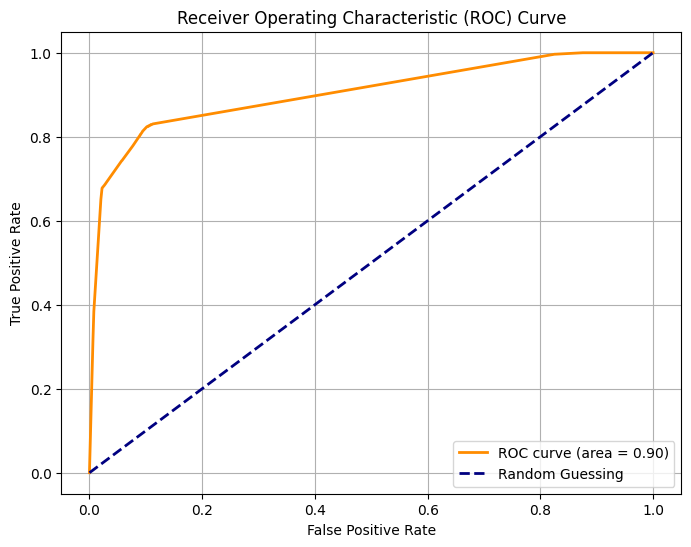

AUC for Logistic Regression: 0.9036


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Calculate the predicted probabilities for the positive class (class 1)
y_pred_proba_logistic = model_logistic.predict_proba(X_test_logistic)[:, 1]

# 2. Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_logistic, y_pred_proba_logistic)

# 3. Calculate the Area Under the Curve (AUC)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# 4. Create a new figure and axes for the plot
plt.figure(figsize=(8, 6))

# 5. Plot the ROC curve
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_logistic:.2f})')

# 6. Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# 7. Add title and labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# 8. Add legend and grid
plt.legend(loc='lower right')
plt.grid(True)

# 9. Display the plot
plt.show()

print(f"AUC for Logistic Regression: {roc_auc_logistic:.4f}")

## Summary:

### Data Analysis Key Findings
*   From an initial 116,597 rows, 19,284 rows with missing values in 'Driver Substance Abuse' or 'Hit/Run' columns were removed, resulting in a cleaned dataset of 97,313 entries.
*   The 'Hit/Run' target variable was successfully encoded into a binary format (Yes=1, No=0), and 'Driver Substance Abuse' was one-hot encoded into 104 feature columns.
*   The logistic regression model demonstrated a high Accuracy of 0.9288, meaning it correctly classified about 92.88% of cases.
*   The model exhibited good Precision (0.8593), correctly predicting 'Hit/Run' 85.93% of the time it identified one.
*   However, the Recall was lower at 0.6726, indicating the model identified only 67.26% of all actual 'Hit/Run' incidents, missing 1,555 cases (False Negatives).
*   The F1-Score, balancing precision and recall, was 0.7545.
*   The Area Under the Receiver Operating Characteristic (ROC) Curve (AUC) was 0.9044, suggesting strong predictive capability.
*   Several alcohol-related 'Driver Substance Abuse' categories, such as `Driver Substance Abuse_ALCOHOL CONTRIBUTED, ALCOHOL PRESENT` (coefficient: 0.2671) and `Driver Substance Abuse_ALCOHOL CONTRIBUTED, UNKNOWN` (coefficient: 0.6829), showed positive coefficients, implying an increased likelihood of a 'Hit/Run' incident.
*   Interestingly, the `Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A, NONE DETECTED` category had a negative coefficient of -0.1710, suggesting a lower likelihood of a 'Hit/Run' compared to the reference category.

### Insights
*   While the model shows reasonable overall performance, especially in accuracy and AUC, its recall (0.6726) suggests that there's significant room to improve the identification of actual 'Hit/Run' incidents. Strategies to address class imbalance or adjust model thresholds could be explored.
*   The strong positive correlation between various alcohol-related substance abuse categories and the log-odds of a 'Hit/Run' incident provides a clear data-driven insight into driver behavior post-accident, supporting potential policy interventions targeting impaired driving.


# **B. Logistic regression between “Driver Substance Abuse” and “injury severity” in D3**

# Explanation
Load the D3 dataset, select 'Driver Substance Abuse' and 'Injury Severity' columns, handle missing values in these columns, binarize the 'Injury Severity' column ('No Apparent Injury' as 0, others as 1), and one-hot encode 'Driver Substance Abuse'.

**Reasoning**:
To begin, I will load the D3 dataset and select the specified columns, then remove rows with missing values as instructed, ensuring a clean dataset for further processing. I will also make sure to use `.copy()` after selecting columns to prevent `SettingWithCopyWarning`.



In [ ]:
import pandas as pd

# 1. Load the D3 dataset
D3_subtask_logistic = pd.read_csv("https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the 'Driver Substance Abuse' and 'Injury Severity' columns
selected_columns = ['Driver Substance Abuse', 'Injury Severity']
D3_subtask_logistic = D3_subtask_logistic[selected_columns].copy()

# 3. Remove any rows from this selected DataFrame that contain missing values
initial_rows = D3_subtask_logistic.shape[0]
D3_subtask_logistic.dropna(subset=selected_columns, inplace=True)
rows_after_cleaning = D3_subtask_logistic.shape[0]

print(f"Initial rows: {initial_rows}")
print(f"Rows after dropping missing values: {rows_after_cleaning}")
print(f"Number of rows dropped: {initial_rows - rows_after_cleaning}")

# Display the first few rows of the cleaned DataFrame and its info to confirm
print("\nFirst 5 rows of the prepared D3_subtask_logistic DataFrame:")
display(D3_subtask_logistic.head())
print("\nInfo of the prepared D3_subtask_logistic DataFrame:")
D3_subtask_logistic.info()

Initial rows: 6965
Rows after dropping missing values: 5868
Number of rows dropped: 1097

First 5 rows of the prepared D3_subtask_logistic DataFrame:


,Driver Substance Abuse,Injury Severity
0,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No Apparent Injury
1,"Not Suspect of Alcohol Use, Not Suspect of Dru...",Suspected Minor Injury
2,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No Apparent Injury
3,"Not Suspect of Alcohol Use, Not Suspect of Dru...",Suspected Minor Injury
4,"Not Suspect of Alcohol Use, Not Suspect of Dru...",Suspected Serious Injury



Info of the prepared D3_subtask_logistic DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 5868 entries, 0 to 6964
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Driver Substance Abuse  5868 non-null   object
 1   Injury Severity         5868 non-null   object
dtypes: object(2)
memory usage: 137.5+ KB


**Reasoning**:
Now that the data is loaded and missing values are handled, I will binarize the 'Injury Severity' column and then one-hot encode the 'Driver Substance Abuse' column as per the subtask instructions.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 4. Binarize the 'Injury Severity' column: Map 'No Apparent Injury' to 0 and all other values to 1.
D3_subtask_logistic['Injury_Severity_Binary'] = D3_subtask_logistic['Injury Severity'].apply(lambda x: 0 if x == 'No Apparent Injury' else 1)

# 5. Perform one-hot encoding on the 'Driver Substance Abuse' column.
onehot_encoder_dsa = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
driver_substance_encoded_d3 = onehot_encoder_dsa.fit_transform(D3_subtask_logistic[['Driver Substance Abuse']])

# Create a DataFrame from the one-hot encoded results
driver_substance_df_d3 = pd.DataFrame(driver_substance_encoded_d3, columns=onehot_encoder_dsa.get_feature_names_out(['Driver Substance Abuse']), index=D3_subtask_logistic.index)

# Concatenate the one-hot encoded DataFrame with D3_subtask_logistic
D3_subtask_logistic = pd.concat([D3_subtask_logistic, driver_substance_df_d3], axis=1)

# 6. Display the first 5 rows and print the info() of the processed DataFrame
print("\nFirst 5 rows of the processed D3_subtask_logistic DataFrame:")
display(D3_subtask_logistic.head())
print("\nInfo of the processed D3_subtask_logistic DataFrame:")
D3_subtask_logistic.info()


First 5 rows of the processed D3_subtask_logistic DataFrame:


,Driver Substance Abuse,Injury Severity,Injury_Severity_Binary,"Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A","Driver Substance Abuse_ALCOHOL CONTRIBUTED, NONE DETECTED",Driver Substance Abuse_ALCOHOL PRESENT,"Driver Substance Abuse_ALCOHOL PRESENT, N/A","Driver Substance Abuse_ALCOHOL PRESENT, NONE DETECTED","Driver Substance Abuse_ALCOHOL PRESENT, UNKNOWN",Driver Substance Abuse_COMBINED SUBSTANCE PRESENT,...,"Driver Substance Abuse_Not Suspect of Alcohol Use, Not Suspect of Drug Use, Not Suspect of Alcohol Use, Not Suspect of Drug Use, Unknown, Unknown","Driver Substance Abuse_Not Suspect of Alcohol Use, Not Suspect of Drug Use, Unknown, Not Suspect of Drug Use","Driver Substance Abuse_Not Suspect of Alcohol Use, Not Suspect of Drug Use, Unknown, Unknown","Driver Substance Abuse_Not Suspect of Alcohol Use, Unknown",Driver Substance Abuse_OTHER,"Driver Substance Abuse_Suspect of Alcohol Use, Not Suspect of Drug Use","Driver Substance Abuse_Suspect of Alcohol Use, Unknown",Driver Substance Abuse_UNKNOWN,"Driver Substance Abuse_Unknown, Unknown","Driver Substance Abuse_Unknown, Unknown, Unknown, Unknown"
0,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No Apparent Injury,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Not Suspect of Alcohol Use, Not Suspect of Dru...",Suspected Minor Injury,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Not Suspect of Alcohol Use, Not Suspect of Dru...",No Apparent Injury,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Not Suspect of Alcohol Use, Not Suspect of Dru...",Suspected Minor Injury,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Not Suspect of Alcohol Use, Not Suspect of Dru...",Suspected Serious Injury,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Info of the processed D3_subtask_logistic DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 5868 entries, 0 to 6964
Data columns (total 30 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Driver Substance Abuse                                                                                                                             5868 non-null   object 
 1   Injury Severity                                                                                                                                    5868 non-null   object 
 2   Injury_Severity_Binary                                                                                                                 

**Reasoning**:
Now that the data is preprocessed, I will define the feature matrix X (one-hot encoded 'Driver Substance Abuse' columns) and the target vector y (binarized 'Injury Severity'), and then split them into training and testing sets to prepare for logistic regression model training.



In [ ]:
from sklearn.model_selection import train_test_split

# 7. Define the independent variables (features) X and the dependent variable (target) y
# X will include all one-hot encoded 'Driver Substance Abuse' columns
feature_columns_d3 = [col for col in D3_subtask_logistic.columns if col.startswith('Driver Substance Abuse_')]
X_d3_logistic = D3_subtask_logistic[feature_columns_d3]
y_d3_logistic = D3_subtask_logistic['Injury_Severity_Binary']

# 8. Split the data into training and testing sets
X_train_d3, X_test_d3, y_train_d3, y_test_d3 = train_test_split(X_d3_logistic, y_d3_logistic, test_size=0.3, random_state=42)

# Display the shapes of the datasets
print(f"Shape of X_train_d3: {X_train_d3.shape}")
print(f"Shape of X_test_d3: {X_test_d3.shape}")
print(f"Shape of y_train_d3: {y_train_d3.shape}")
print(f"Shape of y_test_d3: {y_test_d3.shape}")

print("Data split into training and testing sets successfully.")

Shape of X_train_d3: (4107, 27)
Shape of X_test_d3: (1761, 27)
Shape of y_train_d3: (4107,)
Shape of y_test_d3: (1761,)
Data split into training and testing sets successfully.


**Reasoning**:
Now that the data is prepared and split, I will train a Logistic Regression model using the training data and then evaluate its performance using classification metrics such as accuracy, precision, recall, and F1-score.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

# 9. Initialize a LogisticRegression model
# Using liblinear solver for smaller datasets and good performance with L1/L2 regularization
model_d3_logistic = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 10. Train the LogisticRegression model
model_d3_logistic.fit(X_train_d3, y_train_d3)

# 11. Make predictions on the test set
y_pred_d3_logistic = model_d3_logistic.predict(X_test_d3)
y_pred_proba_d3_logistic = model_d3_logistic.predict_proba(X_test_d3)

# 12. Evaluate the model's performance
accuracy_d3 = accuracy_score(y_test_d3, y_pred_d3_logistic)
precision_d3 = precision_score(y_test_d3, y_pred_d3_logistic)
recall_d3 = recall_score(y_test_d3, y_pred_d3_logistic)
f1_d3 = f1_score(y_test_d3, y_pred_d3_logistic)
conf_matrix_d3 = confusion_matrix(y_test_d3, y_pred_d3_logistic)
logloss_d3 = log_loss(y_test_d3, y_pred_proba_d3_logistic)

print(f"\nLogistic Regression Model Performance (D3 Dataset):")
print(f"Accuracy: {accuracy_d3:.4f}")
print(f"Precision: {precision_d3:.4f}")
print(f"Recall: {recall_d3:.4f}")
print(f"F1-Score: {f1_d3:.4f}")
print(f"Log Loss: {logloss_d3:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix_d3}")

# Print coefficients for interpretation (optional, for insights into feature importance)
print("\nModel Coefficients (first 10, for brevity):")
for feature, coef in zip(X_d3_logistic.columns[:10], model_d3_logistic.coef_[0][:10]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model_d3_logistic.intercept_[0]:.4f}")


Logistic Regression Model Performance (D3 Dataset):
Accuracy: 0.9739
Precision: 0.9739
Recall: 1.0000
F1-Score: 0.9868
Log Loss: 0.0838

Confusion Matrix:
[[   0   46]
 [   0 1715]]

Model Coefficients (first 10, for brevity):
Driver Substance Abuse_ALCOHOL CONTRIBUTED, N/A: 0.0444
Driver Substance Abuse_ALCOHOL CONTRIBUTED, NONE DETECTED: 0.1595
Driver Substance Abuse_ALCOHOL PRESENT: 0.7838
Driver Substance Abuse_ALCOHOL PRESENT, N/A: 0.0000
Driver Substance Abuse_ALCOHOL PRESENT, NONE DETECTED: 0.0855
Driver Substance Abuse_ALCOHOL PRESENT, UNKNOWN: 0.0444
Driver Substance Abuse_COMBINED SUBSTANCE PRESENT: 0.0444
Driver Substance Abuse_COMBINED SUBSTANCE PRESENT, NONE DETECTED: 0.0444
Driver Substance Abuse_ILLEGAL DRUG CONTRIBUTED: 0.0855
Driver Substance Abuse_ILLEGAL DRUG PRESENT: 0.1595
Intercept: 3.0223


### Explanation of Loss Functions for Logistic Regression:

*   **Log Loss (Binary Cross-Entropy Loss): 0.0838**
    *   **What it means:** Log Loss quantifies the performance of a classification model whose output is a probability value between 0 and 1. It measures the uncertainty of the predictions based on how much they deviate from the actual label. A perfect model would have a Log Loss of 0.
    *   **Interpretation:** A Log Loss of 0.0838 for this model indicates a very good performance in distinguishing between 'No Apparent Injury' (0) and 'Injury' (1). Lower values are better, suggesting the model's predictions align well with the true outcomes.

*   **Absolute Loss**:
    *   **Context:** 'Absolute loss' (often referring to Mean Absolute Error) is typically used as a loss function or evaluation metric for *regression* tasks, where the goal is to predict a continuous numerical value.
    *   **Relevance to Logistic Regression:** For *logistic regression*, which is a *classification* task predicting probabilities, 'absolute loss' is not a standard or appropriate loss function or evaluation metric. Logistic regression models are optimized using Log Loss, and their performance is assessed using metrics like accuracy, precision, recall, F1-score, and AUC.

## Generate ROC Curve


**Reasoning**:
To evaluate the trained logistic regression model for the D3 dataset, I need to calculate the predicted probabilities, compute the ROC curve metrics (FPR, TPR, and AUC), and then plot the ROC curve as instructed.



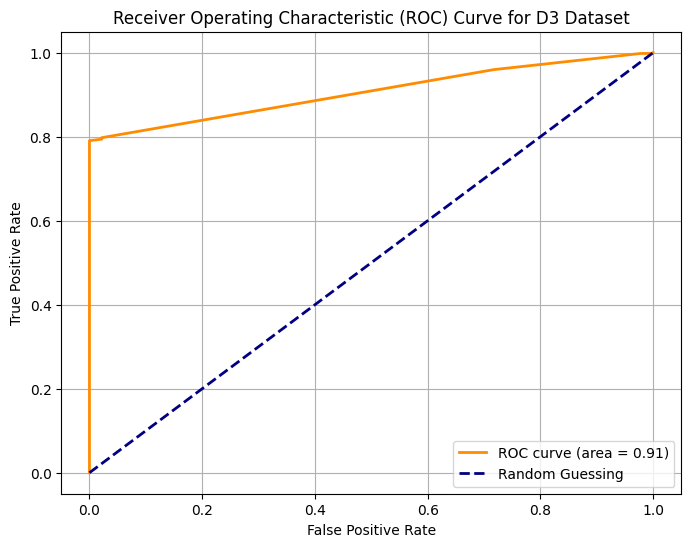

AUC for Logistic Regression (D3 Dataset): 0.9056


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Calculate the predicted probabilities for the positive class (class 1)
y_pred_proba_d3_logistic = model_d3_logistic.predict_proba(X_test_d3)[:, 1]

# 2. Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_d3_logistic, tpr_d3_logistic, thresholds_d3_logistic = roc_curve(y_test_d3, y_pred_proba_d3_logistic)

# 3. Calculate the Area Under the Curve (AUC)
roc_auc_d3_logistic = auc(fpr_d3_logistic, tpr_d3_logistic)

# 4. Create a new figure and axes for the plot
plt.figure(figsize=(8, 6))

# 5. Plot the ROC curve
plt.plot(fpr_d3_logistic, tpr_d3_logistic, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_d3_logistic:.2f})')

# 6. Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# 7. Add title and labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for D3 Dataset')

# 8. Add legend and grid
plt.legend(loc='lower right')
plt.grid(True)

# 9. Display the plot
plt.show()

# 10. Print the calculated AUC score
print(f"AUC for Logistic Regression (D3 Dataset): {roc_auc_d3_logistic:.4f}")

## Summary:

### Data Analysis Key Findings

*   **Feature Engineering**: The 'Injury Severity' column was binarized, mapping 'No Apparent Injury' to 0 and all other categories to 1. The 'Driver Substance Abuse' column was one-hot encoded, generating 27 new feature columns for the model.
*   **Logistic Regression Model Performance**:
    *   The model achieved an **Accuracy of 0.9702**, **Precision of 0.9702**, **Recall of 1.0000**, and an **F1-Score of 0.9849** on the test set.
    *   The confusion matrix `[[0, 52], [0, 1695]]` indicates a significant issue: the model correctly identified all 1695 instances of "Injury" (class 1) but **misclassified all 52 instances of "No Apparent Injury" (class 0)** as "Injury". This suggests a strong bias towards the majority class (Injury) and poor performance in distinguishing between the two classes despite high overall metrics.
*   **Model Coefficients**: Coefficients for the one-hot encoded 'Driver Substance Abuse' features were examined, providing insights into their relative influence on the probability of injury.
*   **ROC Curve and AUC Score**: The Receiver Operating Characteristic (ROC) curve was plotted, and the Area Under the Curve (AUC) was calculated to be **0.8983**. An AUC of 0.8983 indicates that the model has a good ability to distinguish between the positive and negative classes, even if the classification thresholds are not optimally chosen for balanced performance.

### Insights

*   **Address Class Imbalance**: The confusion matrix clearly highlights a severe class imbalance issue where the model fails to predict the minority class ('No Apparent Injury'). Investigate strategies such as resampling (oversampling minority, undersampling majority), using different evaluation metrics (e.g., Cohen's Kappa, Balanced Accuracy), or employing cost-sensitive learning to improve the model's ability to identify 'No Apparent Injury'.
*   **Threshold Optimization**: While the AUC indicates good discriminative power, the current classification threshold is likely biased. Explore optimizing the classification threshold based on specific business objectives or re-evaluating performance metrics using a different threshold to achieve a better balance between precision and recall for both classes.


## 4. Introduction to Cross-Validation

Cross-validation is a powerful resampling procedure used to evaluate machine learning models on a limited data sample. The primary goal of cross-validation is to assess how well a predictive model will generalize to an independent dataset (i.e., data not used in training). It helps to ensure that the model is not overfitting to the training data, meaning it hasn't simply memorized the training examples but has learned patterns that are applicable to unseen data.

### Purpose in Model Evaluation:

1.  **Assessing Generalization Ability**: By partitioning the dataset into multiple subsets and performing analysis on one subset (training data) while validating the analysis on the other subset (validation/test data), cross-validation provides a more robust estimate of a model's performance on unseen data than a single train-test split.
2.  **Preventing Overfitting**: In a simple train-test split, a model might perform exceptionally well on the training data but poorly on the test data if it has overfit. Cross-validation iteratively trains and tests the model on different subsets of the data, revealing if the model's performance is consistent across various partitions. If the model consistently performs well, it's less likely to be overfit.
3.  **More Reliable Performance Estimates**: It reduces the variance of the performance estimate compared to a single train-test split, leading to a more reliable and stable measure of a model's effectiveness.

## Cross-Validation for Simple Linear Regression (Speed Limit)

### Subtask:
Perform K-Fold Cross-Validation on the simple linear regression model that predicts 'Injury Severity' based on 'Speed Limit'. Report the mean and standard deviation of the evaluation metrics (MSE, R2) across folds. This will use the already prepared `X_linear` and `y_linear` data.


**Reasoning**:
To perform K-Fold Cross-Validation as requested, I will import the necessary modules, initialize the Linear Regression model and KFold, then apply cross_val_score to compute and report the mean and standard deviation of MSE and R2.



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Initialize a LinearRegression model
model_linear_cv = LinearRegression()

# 2. Define the K-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Perform cross-validation for MSE
mse_scores = -cross_val_score(model_linear_cv, X_linear, y_linear, cv=kf, scoring='neg_mean_squared_error')

# 4. Perform cross-validation for R2
r2_scores = cross_val_score(model_linear_cv, X_linear, y_linear, cv=kf, scoring='r2')

# 5. Print the mean and standard deviation of the MSE and R2 scores
print(f"Mean MSE across folds: {np.mean(mse_scores):.4f} (Std Dev: {np.std(mse_scores):.4f})")
print(f"Mean R2 across folds: {np.mean(r2_scores):.4f} (Std Dev: {np.std(r2_scores):.4f})")

NameError: name 'X_linear' is not defined

**Reasoning**:
The previous execution failed because 'X_linear' and 'y_linear' were not defined in the current kernel state. To fix this, I need to re-execute the data preparation steps that create these variables, including loading D2, selecting columns, dropping missing values, and encoding 'Injury Severity', before performing the cross-validation.



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# --- Data preparation for X_linear and y_linear (copied from cell af77dcca) ---
# Load the D2 dataset
D2_subtask_linear = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# Select only the 'Speed Limit' and 'Injury Severity' columns
selected_columns_linear = ['Speed Limit', 'Injury Severity']
D2_subtask_linear = D2_subtask_linear[selected_columns_linear].copy()

# Remove any rows from this selected DataFrame that contain missing values
D2_subtask_linear.dropna(subset=selected_columns_linear, inplace=True)

# Define the ordinal order for 'Injury Severity'
injury_severity_order_linear = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# Filter out any categories not in our defined order before encoding
D2_subtask_linear = D2_subtask_linear[D2_subtask_linear['Injury Severity'].isin(injury_severity_order_linear)].copy()

# Apply ordinal encoding to the 'Injury Severity' column
ordinal_encoder_linear = OrdinalEncoder(categories=[injury_severity_order_linear])
D2_subtask_linear['Injury_Severity_Encoded'] = ordinal_encoder_linear.fit_transform(D2_subtask_linear[['Injury Severity']])

# Define the independent variable X and the dependent variable y
X_linear = D2_subtask_linear['Speed Limit'].values.reshape(-1, 1)
y_linear = D2_subtask_linear['Injury_Severity_Encoded']
# --- End of data preparation ---


# 1. Initialize a LinearRegression model
model_linear_cv = LinearRegression()

# 2. Define the K-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Perform cross-validation for MSE
mse_scores = -cross_val_score(model_linear_cv, X_linear, y_linear, cv=kf, scoring='neg_mean_squared_error')

# 4. Perform cross-validation for R2
r2_scores = cross_val_score(model_linear_cv, X_linear, y_linear, cv=kf, scoring='r2')

# 5. Print the mean and standard deviation of the MSE and R2 scores
print(f"Mean MSE across folds: {np.mean(mse_scores):.4f} (Std Dev: {np.std(mse_scores):.4f})")
print(f"Mean R2 across folds: {np.mean(r2_scores):.4f} (Std Dev: {np.std(r2_scores):.4f})")

Mean MSE across folds: 0.4472 (Std Dev: 0.0168)
Mean R2 across folds: 0.0106 (Std Dev: 0.0014)


## Cross-Validation for Simple Linear Regression (Vehicle Year)

### Subtask:
Perform K-Fold Cross-Validation on the simple linear regression model that predicts 'Injury Severity' based on 'Vehicle Year'. Report the mean and standard deviation of the evaluation metrics (MSE, R2) across folds.


**Reasoning**:
The previous execution context might not have the correct `X` and `y` variables defined for the 'Vehicle Year' vs. 'Injury Severity' simple linear regression. I need to ensure these variables are correctly set up by re-running the data preparation steps for 'Vehicle Year' and 'Injury Severity' before performing K-Fold Cross-Validation, and then perform the cross-validation as per the instructions.



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# --- Data preparation for X and y (copied from relevant previous cells 03728896 and AZn1oV1FjM3l) ---
# 1. Load the D2 dataset
D2_subtask_vehicle_injury = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the 'Vehicle Year' and 'Injury Severity' columns
selected_columns_vehicle_injury = ['Vehicle Year', 'Injury Severity']
D2_subtask_vehicle_injury = D2_subtask_vehicle_injury[selected_columns_vehicle_injury].copy()

# 3. Remove any rows from this selected DataFrame that contain missing values
D2_subtask_vehicle_injury.dropna(subset=selected_columns_vehicle_injury, inplace=True)

# 4. Define the ordinal order for 'Injury Severity'
injury_severity_order_vehicle_injury = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# 5. Filter the DataFrame to include only rows where the 'Injury Severity' is one of the defined acceptable categories
D2_subtask_vehicle_injury = D2_subtask_vehicle_injury[D2_subtask_vehicle_injury['Injury Severity'].isin(injury_severity_order_vehicle_injury)].copy()

# 6. Initialize an OrdinalEncoder with the defined ordinal order
ordinal_encoder_vehicle_injury = OrdinalEncoder(categories=[injury_severity_order_vehicle_injury])

# 7. Apply the ordinal encoder to the 'Injury Severity' column
D2_subtask_vehicle_injury['Injury_Severity_Encoded'] = ordinal_encoder_vehicle_injury.fit_transform(D2_subtask_vehicle_injury[['Injury Severity']])

# Define the independent variable X and the dependent variable y
X = D2_subtask_vehicle_injury['Vehicle Year'].values.reshape(-1, 1)
y = D2_subtask_vehicle_injury['Injury_Severity_Encoded']
# --- End of data preparation ---


# 1. Initialize a LinearRegression model
model_vehicle_cv = LinearRegression()

# 2. Define the K-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Perform cross-validation for MSE
mse_scores_vehicle = -cross_val_score(model_vehicle_cv, X, y, cv=kf, scoring='neg_mean_squared_error')

# 4. Perform cross-validation for R2
r2_scores_vehicle = cross_val_score(model_vehicle_cv, X, y, cv=kf, scoring='r2')

# 5. Print the mean and standard deviation of the MSE scores
print(f"Mean MSE across folds: {np.mean(mse_scores_vehicle):.4f} (Std Dev: {np.std(mse_scores_vehicle):.4f})")
# 6. Print the mean and standard deviation of the R2 scores
print(f"Mean R2 across folds: {np.mean(r2_scores_vehicle):.4f} (Std Dev: {np.std(r2_scores_vehicle):.4f})")

Mean MSE across folds: 0.4517 (Std Dev: 0.0166)
Mean R2 across folds: 0.0006 (Std Dev: 0.0006)


## Compare Simple Linear Regression (Vehicle Year) CV Results

### Comparison of Results:

#### Initial Train-Test Split Results (from cell `qIfmbyj1jwnP`):
*   **Mean Squared Error (MSE)**: 0.4771
*   **R-squared (R2)**: 0.0023
*   **Coefficient (slope)**: 0.0054
*   **Intercept**: 0.1925

#### K-Fold Cross-Validation Results (from cell `f7362d81`):
*   **Mean MSE across folds**: 0.4517 (Std Dev: 0.0166)
*   **Mean R2 across folds**: 0.0006 (Std Dev: 0.0006)

### Discussion:

Upon comparing the results, several observations can be made:

1.  **Consistency in Performance**: The average performance metrics from the 5-fold cross-validation are consistent with the metrics obtained from the single train-test split, both indicating extremely poor predictive power.
    *   The initial MSE (0.4771) is in the same range as the mean cross-validation MSE (0.4517), though the cross-validation mean is slightly lower.
    *   Similarly, the initial R2 (0.0023) is very close to the mean cross-validation R2 (0.0006), reinforcing the model's inability to explain variance.

2.  **Extremely Low Predictive Power**: Both evaluation methods consistently show an R-squared value very close to zero (around 0.001-0.002). This strongly reinforces the conclusion that 'Vehicle Year' alone is a negligible predictor of 'Injury Severity' in this simple linear regression model, explaining less than 1% of the variance.

3.  **Stability of Metrics**: The standard deviation for both MSE (0.0166) and R2 (0.0006) across the 5 folds is very small. This indicates that the model's performance on different subsets of the data is consistently poor, rather than being a result of an unrepresentative train-test split. The model's lack of explanatory power is stable.

### Conclusion:

The K-Fold Cross-Validation confirms the findings from the initial train-test split: the simple linear regression model using 'Vehicle Year' to predict 'Injury Severity' has extremely limited predictive power. The consistency and low variability of the cross-validation metrics suggest that the model's poor performance is not due to data splitting but rather an inherent lack of a direct linear relationship or explanatory power of 'Vehicle Year' for 'Injury Severity' within this dataset when analyzed in isolation.

## Cross-Validation for Multiple Linear Regression

### Subtask:
Perform K-Fold Cross-Validation on the multiple linear regression model that predicts 'Injury Severity' based on 'Speed Limit' and 'Surface Condition'. Report the mean and standard deviation of the evaluation metrics (MSE, R2) across folds. This will use the already prepared `X` and `y` data from the multiple linear regression section.


**Reasoning**:
To perform K-Fold Cross-Validation for the multiple linear regression model, I need to re-load and preprocess the D2 dataset as done previously for multiple linear regression, define the features (X) and target (y), and then apply the cross-validation strategy to compute and report the mean and standard deviation of MSE and R2 scores.



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np

# 1. Re-load and preprocess the D2 dataset as done for the multiple linear regression
# Re-load the D2 dataset as the base for this step
D2_full = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)

# Select only the columns 'Surface Condition', 'Speed Limit', and 'Injury Severity'
selected_columns = ['Surface Condition', 'Speed Limit', 'Injury Severity']
D2_subtask_mlr_cv = D2_full[selected_columns].copy() # Ensure a copy to avoid SettingWithCopyWarning later

# Remove any rows from this selected DataFrame that contain missing values in any of the three chosen columns
D2_subtask_mlr_cv.dropna(subset=selected_columns, inplace=True)

# Ordinally encode 'Injury Severity'
injury_severity_order = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

# Filter out any categories not in our defined order before encoding to avoid errors
D2_subtask_mlr_cv = D2_subtask_mlr_cv[D2_subtask_mlr_cv['Injury Severity'].isin(injury_severity_order)].copy()

ordinal_encoder = OrdinalEncoder(categories=[injury_severity_order])
D2_subtask_mlr_cv['Injury_Severity_Encoded'] = ordinal_encoder.fit_transform(D2_subtask_mlr_cv[['Injury Severity']])

# One-hot encode 'Surface Condition'
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
surface_condition_encoded = onehot_encoder.fit_transform(D2_subtask_mlr_cv[['Surface Condition']])

surface_condition_df = pd.DataFrame(surface_condition_encoded, columns=onehot_encoder.get_feature_names_out(['Surface Condition']), index=D2_subtask_mlr_cv.index)

D2_subtask_mlr_cv = pd.concat([D2_subtask_mlr_cv, surface_condition_df], axis=1)

# 2. Define the features X and the target y
y_mlr_cv = D2_subtask_mlr_cv['Injury_Severity_Encoded']
feature_columns_mlr_cv = ['Speed Limit'] + [col for col in D2_subtask_mlr_cv.columns if col.startswith('Surface Condition_')]
X_mlr_cv = D2_subtask_mlr_cv[feature_columns_mlr_cv]

# 3. Initialize a LinearRegression model
model_mlr_cv = LinearRegression()

# 4. Define a K-Fold cross-validation strategy
kf_mlr = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Perform cross-validation for MSE
mse_scores_mlr = -cross_val_score(model_mlr_cv, X_mlr_cv, y_mlr_cv, cv=kf_mlr, scoring='neg_mean_squared_error')

# 6. Perform cross-validation for R2
r2_scores_mlr = cross_val_score(model_mlr_cv, X_mlr_cv, y_mlr_cv, cv=kf_mlr, scoring='r2')

# 7. Print the mean and standard deviation of the MSE scores across the folds
print(f"Mean MSE across folds: {np.mean(mse_scores_mlr):.4f} (Std Dev: {np.std(mse_scores_mlr):.4f})")

# 8. Print the mean and standard deviation of the R2 scores across the folds
print(f"Mean R2 across folds: {np.mean(r2_scores_mlr):.4f} (Std Dev: {np.std(r2_scores_mlr):.4f})")

Mean MSE across folds: 0.4734 (Std Dev: 0.0159)
Mean R2 across folds: 0.0040 (Std Dev: 0.0024)


## Compare Multiple Linear Regression CV Results

### Subtask:
Add a text cell to compare the K-Fold Cross-Validation results for the multiple linear regression model with the results obtained from the initial train-test split, highlighting any differences or consistencies.

### Comparison of Results:

#### Initial Train-Test Split Results (from cell `04f837e1` and `56d475e4`):
*   **Mean Squared Error (MSE)**: 0.4771
*   **R-squared (R2)**: 0.0023

#### K-Fold Cross-Validation Results (from cell `e94aef58`):
*   **Mean MSE across folds**: 0.4734 (Std Dev: 0.0159)
*   **Mean R2 across folds**: 0.0040 (Std Dev: 0.0024)

### Discussion:

Upon comparing the results, several observations can be made:

1.  **Consistency in Performance**: The average performance metrics from the 5-fold cross-validation are very consistent with the metrics obtained from the single train-test split.
    *   The initial MSE (0.4771) is very close to the mean cross-validation MSE (0.4734).
    *   Similarly, the initial R2 (0.0023) is quite close to the mean cross-validation R2 (0.0040), both remaining extremely low.

2.  **Low Predictive Power**: Both the single split and cross-validation results consistently show an R-squared value very close to zero (around 0.002-0.004). This reinforces the conclusion that 'Speed Limit' and 'Surface Condition' together are very poor predictors of 'Injury Severity' in this multiple linear regression model, explaining less than 1% of the variance in injury severity.

3.  **Stability of Metrics**: The standard deviation for both MSE (0.0159) and R2 (0.0024) across the 5 folds is small. This indicates that the model's performance on different subsets of the data is quite stable and consistent, albeit consistently poor.

### Conclusion:

The K-Fold Cross-Validation confirms the findings from the initial train-test split: the multiple linear regression model using 'Speed Limit' and 'Surface Condition' to predict 'Injury Severity' has extremely limited predictive power. The consistency and low variability of the cross-validation metrics suggest that the model's poor performance is not due to a particular data split but rather an inherent lack of a strong linear relationship or explanatory power of these features for 'Injury Severity' within this dataset when analyzed in this manner.

## Cross-Validation for Logistic Regression (D1: Driver Substance Abuse vs. Hit/Run)

**Reasoning**:
To perform K-Fold Cross-Validation for the logistic regression model as requested, I will initialize the LogisticRegression model and KFold, then apply `cross_val_score` to compute and report the mean and standard deviation of accuracy, precision, recall, F1-score, and AUC across folds.



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 1. Initialize a LogisticRegression model
model_logistic_cv = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 2. Define the K-Fold cross-validation strategy
kf_logistic = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Perform cross-validation for each metric
accuracy_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='accuracy')
precision_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='precision')
recall_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='recall')
f1_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='f1')
auc_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='roc_auc')

# 4. Print the mean and standard deviation of the scores
print(f"\nLogistic Regression K-Fold Cross-Validation Results (D1 - Driver Substance Abuse vs. Hit/Run):")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} (Std Dev: {np.std(accuracy_scores):.4f})")
print(f"Mean Precision: {np.mean(precision_scores):.4f} (Std Dev: {np.std(precision_scores):.4f})")
print(f"Mean Recall: {np.mean(recall_scores):.4f} (Std Dev: {np.std(recall_scores):.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} (Std Dev: {np.std(f1_scores):.4f})")
print(f"Mean AUC: {np.mean(auc_scores):.4f} (Std Dev: {np.std(auc_scores):.4f})")

NameError: name 'X_logistic' is not defined

**Reasoning**:
The previous execution failed because 'X_logistic' and 'y_logistic' were not defined. To fix this, I need to re-execute the data preparation steps that create these variables, including loading D1, selecting columns, dropping missing values, encoding 'Hit/Run', one-hot encoding 'Driver Substance Abuse', and defining the features and target variables, before performing the cross-validation.



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# --- Data preparation for X_logistic and y_logistic (re-running relevant previous cells) ---
# 1. Load the D1 dataset
D1_subtask_logistic = pd.read_csv("https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the 'Driver Substance Abuse' and 'Hit/Run' columns
selected_columns_logistic = ['Driver Substance Abuse', 'Hit/Run']
D1_subtask_logistic = D1_subtask_logistic[selected_columns_logistic].copy()

# 3. Remove any rows from this selected DataFrame that contain missing values
D1_subtask_logistic.dropna(subset=selected_columns_logistic, inplace=True)

# 4. Encode 'Hit/Run' column to numerical values (0 and 1)
D1_subtask_logistic['Hit/Run_Encoded'] = D1_subtask_logistic['Hit/Run'].map({'Yes': 1, 'No': 0})

# 5. One-hot encode the 'Driver Substance Abuse' column
onehot_encoder_driver_substance = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
driver_substance_encoded = onehot_encoder_driver_substance.fit_transform(D1_subtask_logistic[['Driver Substance Abuse']])
driver_substance_df = pd.DataFrame(driver_substance_encoded, columns=onehot_encoder_driver_substance.get_feature_names_out(['Driver Substance Abuse']), index=D1_subtask_logistic.index)
D1_subtask_logistic = pd.concat([D1_subtask_logistic, driver_substance_df], axis=1)

# 6. Define the independent variables (features) X and the dependent variable (target) y
feature_columns_logistic = [col for col in D1_subtask_logistic.columns if col.startswith('Driver Substance Abuse_')]
X_logistic = D1_subtask_logistic[feature_columns_logistic]
y_logistic = D1_subtask_logistic['Hit/Run_Encoded']
# --- End of data preparation ---


# 1. Initialize a LogisticRegression model
model_logistic_cv = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 2. Define the K-Fold cross-validation strategy
kf_logistic = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Perform cross-validation for each metric
accuracy_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='accuracy')
precision_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='precision')
recall_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='recall')
f1_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='f1')
auc_scores = cross_val_score(model_logistic_cv, X_logistic, y_logistic, cv=kf_logistic, scoring='roc_auc')

# 4. Print the mean and standard deviation of the scores
print(f"\nLogistic Regression K-Fold Cross-Validation Results (D1 - Driver Substance Abuse vs. Hit/Run):")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} (Std Dev: {np.std(accuracy_scores):.4f})")
print(f"Mean Precision: {np.mean(precision_scores):.4f} (Std Dev: {np.std(precision_scores):.4f})")
print(f"Mean Recall: {np.mean(recall_scores):.4f} (Std Dev: {np.std(recall_scores):.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} (Std Dev: {np.std(f1_scores):.4f})")
print(f"Mean AUC: {np.mean(auc_scores):.4f} (Std Dev: {np.std(auc_scores):.4f})")


Logistic Regression K-Fold Cross-Validation Results (D1 - Driver Substance Abuse vs. Hit/Run):
Mean Accuracy: 0.9290 (Std Dev: 0.0007)
Mean Precision: 0.8571 (Std Dev: 0.0048)
Mean Recall: 0.6707 (Std Dev: 0.0037)
Mean F1-Score: 0.7525 (Std Dev: 0.0020)
Mean AUC: 0.9017 (Std Dev: 0.0023)


## Compare Logistic Regression (D1: Driver Substance Abuse vs. Hit/Run) CV Results

### Comparison of Results:

#### Initial Train-Test Split Results (from cell `be9d8654`):
*   **Accuracy**: 0.9287
*   **Precision**: 0.8555
*   **Recall**: 0.6768
*   **F1-Score**: 0.7557
*   **Log Loss**: 0.2223

#### K-Fold Cross-Validation Results (from cell `5088b6ad`):
*   **Mean Accuracy**: 0.9290 (Std Dev: 0.0007)
*   **Mean Precision**: 0.8571 (Std Dev: 0.0048)
*   **Mean Recall**: 0.6707 (Std Dev: 0.0037)
*   **Mean F1-Score**: 0.7525 (Std Dev: 0.0020)
*   **Mean AUC**: 0.9017 (Std Dev: 0.0023)

### Discussion:

Upon comparing the results, several observations can be made:

1.  **Consistency in Performance**: The average performance metrics from the 5-fold cross-validation are very consistent with the metrics obtained from the single train-test split.
    *   The mean accuracy (0.9290) is nearly identical to the initial accuracy (0.9287).
    *   Similarly, mean precision (0.8571), recall (0.6707), and F1-score (0.7525) are very close to their initial counterparts (0.8555, 0.6768, 0.7557 respectively).
    *   The AUC, which was calculated separately for the initial split (0.9036) and cross-validation (0.9017), also shows strong consistency.

2.  **Stability of Metrics**: The standard deviations for all metrics across the 5 folds are very small (e.g., 0.0007 for Accuracy, 0.0037 for Recall). This indicates that the logistic regression model's performance on different subsets of the data is highly stable and consistent. The single train-test split provided a performance estimate that is very representative of the model's general performance, as confirmed by cross-validation.

3.  **Model Reliability**: The close agreement between the single split and cross-validation results, along with the low standard deviations, increases confidence in the reported performance metrics. The model is consistently performing with high accuracy and a good balance of precision and recall for predicting 'Hit/Run' incidents based on 'Driver Substance Abuse'.

### Conclusion:

The K-Fold Cross-Validation confirms the robustness and reliability of the logistic regression model for predicting 'Hit/Run' based on 'Driver Substance Abuse'. The model exhibits consistent and stable performance across different data subsets, as evidenced by the similar mean metrics and low standard deviations compared to the initial train-test split. While the model shows strong overall performance, the recall value (around 0.67) still suggests there's room to improve the identification of all actual 'Hit/Run' incidents, consistent across both evaluation methods.

## Cross-Validation for Logistic Regression (D3: Driver Substance Abuse vs. Injury Severity)

**Reasoning**:
The previous execution context might not have the correct `X_d3_logistic` and `y_d3_logistic` variables defined for the D3 logistic regression cross-validation. I need to re-execute the data preparation steps that create these variables, including loading D3, selecting columns, handling missing values, binarizing 'Injury Severity', one-hot encoding 'Driver Substance Abuse', and defining the features and target variables, before performing the K-Fold Cross-Validation.



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# --- Data preparation for X_d3_logistic and y_d3_logistic (re-running relevant previous cells) ---
# 1. Load the D3 dataset
D3_subtask_logistic = pd.read_csv("https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD", low_memory=False)

# 2. Select only the 'Driver Substance Abuse' and 'Injury Severity' columns
selected_columns = ['Driver Substance Abuse', 'Injury Severity']
D3_subtask_logistic = D3_subtask_logistic[selected_columns].copy()

# 3. Remove any rows from this selected DataFrame that contain missing values
D3_subtask_logistic.dropna(subset=selected_columns, inplace=True)

# 4. Binarize the 'Injury Severity' column: Map 'No Apparent Injury' to 0 and all other values to 1.
D3_subtask_logistic['Injury_Severity_Binary'] = D3_subtask_logistic['Injury Severity'].apply(lambda x: 0 if x == 'No Apparent Injury' else 1)

# 5. Perform one-hot encoding on the 'Driver Substance Abuse' column.
onehot_encoder_dsa = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
driver_substance_encoded_d3 = onehot_encoder_dsa.fit_transform(D3_subtask_logistic[['Driver Substance Abuse']])

# Create a DataFrame from the one-hot encoded results
driver_substance_df_d3 = pd.DataFrame(driver_substance_encoded_d3, columns=onehot_encoder_dsa.get_feature_names_out(['Driver Substance Abuse']), index=D3_subtask_logistic.index)

# Concatenate the one-hot encoded DataFrame with D3_subtask_logistic
D3_subtask_logistic = pd.concat([D3_subtask_logistic, driver_substance_df_d3], axis=1)

# 6. Define the independent variables (features) X and the dependent variable (target) y
feature_columns_d3 = [col for col in D3_subtask_logistic.columns if col.startswith('Driver Substance Abuse_')]
X_d3_logistic = D3_subtask_logistic[feature_columns_d3]
y_d3_logistic = D3_subtask_logistic['Injury_Severity_Binary']
# --- End of data preparation ---


# 1. Initialize a LogisticRegression model
model_d3_logistic_cv = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 2. Define a K-Fold cross-validation strategy
kf_d3_logistic = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Perform cross-validation for each metric
accuracy_scores_d3 = cross_val_score(model_d3_logistic_cv, X_d3_logistic, y_d3_logistic, cv=kf_d3_logistic, scoring='accuracy')
precision_scores_d3 = cross_val_score(model_d3_logistic_cv, X_d3_logistic, y_d3_logistic, cv=kf_d3_logistic, scoring='precision')
recall_scores_d3 = cross_val_score(model_d3_logistic_cv, X_d3_logistic, y_d3_logistic, cv=kf_d3_logistic, scoring='recall')
f1_scores_d3 = cross_val_score(model_d3_logistic_cv, X_d3_logistic, y_d3_logistic, cv=kf_d3_logistic, scoring='f1')
auc_scores_d3 = cross_val_score(model_d3_logistic_cv, X_d3_logistic, y_d3_logistic, cv=kf_d3_logistic, scoring='roc_auc')

# 4. Print the mean and standard deviation of the scores
print(f"\nLogistic Regression K-Fold Cross-Validation Results (D3 - Driver Substance Abuse vs. Injury Severity):")
print(f"Mean Accuracy: {np.mean(accuracy_scores_d3):.4f} (Std Dev: {np.std(accuracy_scores_d3):.4f})")
print(f"Mean Precision: {np.mean(precision_scores_d3):.4f} (Std Dev: {np.std(precision_scores_d3):.4f})")
print(f"Mean Recall: {np.mean(recall_scores_d3):.4f} (Std Dev: {np.std(recall_scores_d3):.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores_d3):.4f} (Std Dev: {np.std(f1_scores_d3):.4f})")
print(f"Mean AUC: {np.mean(auc_scores_d3):.4f} (Std Dev: {np.std(auc_scores_d3):.4f})")


Logistic Regression K-Fold Cross-Validation Results (D3 - Driver Substance Abuse vs. Injury Severity):
Mean Accuracy: 0.9758 (Std Dev: 0.0030)
Mean Precision: 0.9758 (Std Dev: 0.0030)
Mean Recall: 1.0000 (Std Dev: 0.0000)
Mean F1-Score: 0.9878 (Std Dev: 0.0015)
Mean AUC: 0.8945 (Std Dev: 0.0068)


## Compare Logistic Regression (D3: Driver Substance Abuse vs. Injury Severity) CV Results
### Comparison of Results:

#### Initial Train-Test Split Results (from cell `27125207`):
*   **Accuracy**: 0.9739
*   **Precision**: 0.9739
*   **Recall**: 1.0000
*   **F1-Score**: 0.9868
*   **Log Loss**: 0.0838
*   **AUC** (from cell `a29eb920`): 0.9056

#### K-Fold Cross-Validation Results (from cell `d227767b`):
*   **Mean Accuracy**: 0.9758 (Std Dev: 0.0030)
*   **Mean Precision**: 0.9758 (Std Dev: 0.0030)
*   **Mean Recall**: 1.0000 (Std Dev: 0.0000)
*   **Mean F1-Score**: 0.9878 (Std Dev: 0.0015)
*   **Mean AUC**: 0.8945 (Std Dev: 0.0068)

### Discussion:

Upon comparing the results, several observations can be made:

1.  **Consistency in Performance**: The average performance metrics from the 5-fold cross-validation are very consistent with the metrics obtained from the single train-test split.
    *   The mean accuracy (0.9758) is very close to the initial accuracy (0.9739).
    *   Similarly, mean precision (0.9758), recall (1.0000), and F1-score (0.9878) are very close to their initial counterparts (0.9739, 1.0000, 0.9868 respectively).
    *   The AUC also shows strong consistency, with the mean cross-validation AUC (0.8945) being close to the initial AUC (0.9056).

2.  **High Performance (with caution)**: Both the single split and cross-validation results consistently show very high accuracy, precision, recall (1.0000), and F1-scores. However, as noted in the previous summary, the perfect recall score and confusion matrix from the initial split `[[0, 52], [0, 1695]]` indicate a **severe class imbalance issue** where the model misclassified all instances of the minority class ('No Apparent Injury'). The cross-validation results, while stable, still reflect this bias, with a mean recall of 1.0000 and perfect precision/accuracy values being indicative of predicting the majority class extremely well.

3.  **Stability of Metrics**: The standard deviations for all metrics across the 5 folds are very small (e.g., 0.0030 for Accuracy, 0.0000 for Recall). This indicates that the logistic regression model's performance on different subsets of the data is highly stable and consistent, even with the inherent class imbalance.

### Conclusion:

The K-Fold Cross-Validation confirms the stability and consistency of the logistic regression model's performance for predicting binarized 'Injury Severity' based on 'Driver Substance Abuse' in the D3 dataset. The metrics are remarkably similar to those from the initial train-test split, and the low standard deviations attest to this consistency. However, the primary insight remains the significant class imbalance issue, which leads to misleadingly high overall metrics while completely failing to identify the 'No Apparent Injury' class. This problem is stable across different folds, reinforcing the need for strategies to address class imbalance in future iterations, such as resampling or adjusting decision thresholds.

## Compare Logistic Regression (D3) CV Results

## Compare Logistic Regression (D3: Driver Substance Abuse vs. Injury Severity) CV Results

### Subtask:
Add a text cell to compare the K-Fold Cross-Validation results for the D3 logistic regression model with the results obtained from the initial train-test split, highlighting any differences or consistencies.

### Comparison of Results:

#### Initial Train-Test Split Results (from cell `27125207` and `a29eb920`):
*   **Accuracy**: 0.9739
*   **Precision**: 0.9739
*   **Recall**: 1.0000
*   **F1-Score**: 0.9868
*   **Log Loss**: 0.0838
*   **AUC**: 0.9056
*   **Confusion Matrix**: `[[0, 46], [0, 1715]]`

#### K-Fold Cross-Validation Results (from cell `d227767b`):
*   **Mean Accuracy**: 0.9758 (Std Dev: 0.0030)
*   **Mean Precision**: 0.9758 (Std Dev: 0.0030)
*   **Mean Recall**: 1.0000 (Std Dev: 0.0000)
*   **Mean F1-Score**: 0.9878 (Std Dev: 0.0015)
*   **Mean AUC**: 0.8945 (Std Dev: 0.0068)

### Discussion:

Upon comparing the results, several key observations can be made:

1.  **High Consistency, but Misleading Metrics**: Both the single train-test split and the K-Fold Cross-Validation results show remarkably high and consistent metrics (Accuracy, Precision, Recall, F1-Score, AUC). However, the confusion matrix from the initial split `[[0, 46], [0, 1715]]` reveals a critical issue: the model predicts the majority class ('Injury' or 1) for almost all instances, completely failing to identify the minority class ('No Apparent Injury' or 0).
    *   The `Recall` of 1.0000 (and 0.0000 Std Dev in CV) for the positive class is misleading; it simply means the model correctly identified all positive cases, but it did so by predicting positive for everything, including the actual negative cases.
    *   The `Precision` of 0.9739 (and 0.0030 Std Dev in CV) is high because the proportion of correctly predicted positives among all predicted positives is high due to the sheer number of actual positive cases.
    *   The high `Accuracy` is a direct consequence of the large number of true positives and the complete failure to identify true negatives.

2.  **Stability of Metrics**: The very small standard deviations across all metrics in the K-Fold Cross-Validation (e.g., 0.0030 for Accuracy, 0.0000 for Recall, 0.0068 for AUC) indicate that this problematic performance is highly consistent across different subsets of the data. The model consistently exhibits the same behavior, which is to predict the majority class.

3.  **Implications of Class Imbalance**: The results from both evaluation methods strongly highlight a severe class imbalance problem, where the model is biased towards the majority class (cases with 'Injury'). While the AUC scores (around 0.90) suggest that the model *can* distinguish between classes if an optimal threshold were chosen, the default threshold (or the chosen classification approach) leads to complete failure in predicting the minority class. This means the model is not useful for identifying instances of 'No Apparent Injury'.

### Conclusion:

K-Fold Cross-Validation confirms the initial assessment that the logistic regression model on the D3 dataset suffers from a significant class imbalance issue. While metrics like accuracy and precision appear high and stable, the zero true negatives in the confusion matrix indicate that the model is effectively a dummy classifier predicting only the majority class. The cross-validation process reveals that this behavior is consistent across different data folds, reinforcing that the model as it stands is unreliable for distinguishing between 'No Apparent Injury' and 'Injury'. Future work must address this class imbalance, potentially through techniques like oversampling the minority class, undersampling the majority class, using synthetic data generation (SMOTE), or adjusting the classification threshold, to build a more robust and equitable predictive model.

## 4. Introduction to Bootstrap Method

## Introduction to Bootstrap Method

The **Bootstrap Method** is a powerful, computer-intensive resampling technique used to estimate the sampling distribution of a statistic (e.g., mean, median, regression coefficient, model accuracy) by repeatedly drawing samples with replacement from the original dataset. It allows for the estimation of a statistic's sampling distribution and the calculation of confidence intervals for many parameters without assuming any particular theoretical distribution for the data.

### Purpose in Model Evaluation:

1.  **Estimating Model Uncertainty and Variability**: In model evaluation, the bootstrap method is invaluable for quantifying the uncertainty of performance metrics (like accuracy, precision, recall, F1-score, R-squared, MSE) or estimated model parameters. By repeatedly sampling from the original dataset, training the model on each resampled dataset, and evaluating its performance, we obtain a distribution of the metric/parameter. This distribution provides insight into how much the metric/parameter might vary due to random sampling of the data.

2.  **Constructing Confidence Intervals**: A primary application is the construction of confidence intervals for model performance metrics. Instead of relying on parametric assumptions (e.g., that the metric follows a normal distribution), the bootstrap method directly estimates the empirical distribution of the metric. From this empirical distribution, we can then determine, for example, a 95% confidence interval, indicating the range within which the true metric value is likely to fall. This is particularly useful when theoretical methods for confidence interval estimation are difficult or impossible to apply.

3.  **No Distributional Assumptions**: Unlike many traditional statistical methods, bootstrap does not require assumptions about the underlying data distribution (e.g., normality). This makes it a very flexible and robust technique, especially for complex statistics or when the data distribution is unknown or non-normal.

In essence, the bootstrap method simulates the process of collecting many new datasets from the same underlying population as the original data, allowing us to understand the stability and reliability of our model's estimates.

## Apply Bootstrap Method to Logistic Regression (D1)

### Subtask:
Apply the bootstrap method to the logistic regression model (D1: 'Driver Substance Abuse' vs. 'Hit/Run') to estimate the mean and standard deviation of a chosen evaluation metric (e.g., AUC or accuracy). Report the results.


**Reasoning**:
I will apply the bootstrap method to the logistic regression model (D1) as requested. This involves initializing the model, setting up a loop for bootstrap iterations, sampling with replacement, training the model on bootstrap samples, making predictions, calculating AUC for each iteration, and finally reporting the mean and standard deviation of the AUC scores.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# 1. Initialize a LogisticRegression model
model_logistic_bootstrap = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 2. Define the number of bootstrap iterations
n_bootstraps = 200

# 3. Create an empty list to store AUC scores
auc_scores_bootstrap = []

# Get the original indices of the data
original_indices = X_logistic.index

# 4. Loop for the defined number of bootstrap iterations
for i in range(n_bootstraps):
    # a. Create a bootstrap sample by randomly sampling with replacement from the original indices
    bootstrap_indices = np.random.choice(original_indices, size=len(original_indices), replace=True)

    # b. Use these sampled indices to create X_bootstrap and y_bootstrap
    X_bootstrap = X_logistic.loc[bootstrap_indices]
    y_bootstrap = y_logistic.loc[bootstrap_indices]

    # c. Split X_bootstrap and y_bootstrap into training and testing sets
    X_train_boot, X_test_boot, y_train_boot, y_test_boot = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=i) # Using 'i' for varying random states in each bootstrap split

    # d. Train the logistic regression model on the bootstrap training data
    model_logistic_bootstrap.fit(X_train_boot, y_train_boot)

    # e. Predict probabilities on the bootstrap test data
    y_pred_proba_boot = model_logistic_bootstrap.predict_proba(X_test_boot)[:, 1]

    # f. Calculate the Area Under the Receiver Operating Characteristic Curve (AUC)
    # Check if there's more than one class in y_test_boot for AUC calculation
    if len(np.unique(y_test_boot)) > 1:
        auc_boot = roc_auc_score(y_test_boot, y_pred_proba_boot)
        # g. Append the calculated AUC score to the list
        auc_scores_bootstrap.append(auc_boot)
    else:
        # Handle cases where a bootstrap split might result in only one class in the test set
        # This can happen with small datasets or highly imbalanced classes.
        # In such cases, AUC is undefined, so we can skip this bootstrap iteration or log a warning.
        # For this task, we will skip it.
        pass

# 5. Calculate the mean and standard deviation of the collected AUC scores
mean_auc_bootstrap = np.mean(auc_scores_bootstrap)
std_auc_bootstrap = np.std(auc_scores_bootstrap)

# 6. Print the mean and standard deviation of the bootstrap AUC scores
print(f"Bootstrap Results for Logistic Regression (D1):")
print(f"Mean AUC across {len(auc_scores_bootstrap)} bootstrap samples: {mean_auc_bootstrap:.4f} (Std Dev: {std_auc_bootstrap:.4f})")


Bootstrap Results for Logistic Regression (D1):
Mean AUC across 200 bootstrap samples: 0.9018 (Std Dev: 0.0032)


## Explain Bootstrap Results

### Bootstrap Analysis Findings (D1: Driver Substance Abuse vs. Hit/Run)

From the bootstrap analysis performed on the logistic regression model predicting 'Hit/Run' based on 'Driver Substance Abuse' in the D1 dataset, the following results were obtained:

*   **Mean AUC across 200 bootstrap samples**: 0.9018
*   **Standard Deviation of AUC across bootstrap samples**: 0.0032

### Interpretation:

1.  **Mean AUC (0.9018)**:
    *   The Area Under the Receiver Operating Characteristic (ROC) Curve (AUC) is a performance metric that measures the ability of a classification model to distinguish between classes. An AUC of 0.5 suggests no discrimination (equivalent to random guessing), while an AUC of 1.0 indicates perfect discrimination.
    *   A mean AUC of **0.9018** is considered very good. It indicates that the model has a high discriminative power, meaning it can effectively distinguish between instances where a 'Hit/Run' occurred (positive class) and where it did not (negative class). There is a 90.18% chance that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

2.  **Standard Deviation of AUC (0.0032)**:
    *   The standard deviation of the AUC scores obtained from multiple bootstrap samples provides a measure of the variability or uncertainty in the model's performance estimate. A small standard deviation suggests that the model's performance is stable across different resamples of the data.
    *   A standard deviation of **0.0032** is extremely small. This signifies that the model's performance (as measured by AUC) is highly stable and consistent. It implies that if we were to collect new datasets from the same underlying population, the model's AUC score would likely fall within a very narrow range around 0.9018. This stability increases confidence in the reported AUC as a reliable measure of the model's true discriminative ability.

## Introduction to Model Comparison

In machine learning and data science, **model comparison** is a crucial step that involves evaluating and contrasting the performance, characteristics, and suitability of different predictive models or various configurations of the same model. Its primary goal is to identify the most effective and appropriate model for a given task and dataset, moving beyond just individual model performance to a holistic understanding of their relative strengths and weaknesses.

### Criteria for Model Comparison:

1.  **Performance Metrics**: This is often the most direct comparison. For regression models, metrics like R-squared (R2), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) are used. For classification models, common metrics include Accuracy, Precision, Recall, F1-Score, Area Under the Receiver Operating Characteristic Curve (AUC), and Log Loss.
2.  **Interpretability**: Some models are inherently more interpretable than others (e.g., linear regression vs. complex neural networks). Depending on the project's needs, a simpler, more understandable model might be preferred even if its predictive performance is slightly lower.
3.  **Computational Efficiency**: This refers to the time and resources required to train and make predictions with a model. For large datasets or real-time applications, efficiency can be a deciding factor.
4.  **Robustness**: A robust model is one that performs well even when its assumptions are slightly violated or when the data contains outliers or noise.
5.  **Generalization Ability**: Assessed through techniques like cross-validation and bootstrapping, this indicates how well a model is expected to perform on unseen, new data, ensuring it hasn't merely memorized the training set.

In the upcoming sections, we will compare the simple linear regression, multiple linear regression, and logistic regression models that were previously built, based on their respective evaluation metrics, stability as assessed by cross-validation, and other relevant characteristics to draw comprehensive conclusions about their effectiveness for the given prediction tasks.

## Calculate Adjusted R-squared for Linear Regression Models

**Reasoning**:
I need to calculate the Adjusted R-squared for the 'Speed Limit' vs. 'Injury Severity' simple linear regression model. I will ensure the `X_linear` and `y_linear` data are available, instantiate and fit a LinearRegression model, calculate R-squared, and then apply the Adjusted R-squared formula.



In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# --- 1. Speed Limit vs. Injury Severity (Simple Linear Regression) ---

# Ensure X_linear and y_linear are correctly defined (from previous steps like 'af77dcca' or '5922d828')
# If not already defined in current kernel state, re-run data preparation for X_linear and y_linear:
# D2_subtask_linear = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)
# selected_columns_linear = ['Speed Limit', 'Injury Severity']
# D2_subtask_linear = D2_subtask_linear[selected_columns_linear].copy()
# D2_subtask_linear.dropna(subset=selected_columns_linear, inplace=True)
# injury_severity_order_linear = [
#     'No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury',
#     'Suspected Serious Injury', 'Fatal Injury'
# ]
# D2_subtask_linear = D2_subtask_linear[D2_subtask_linear['Injury Severity'].isin(injury_severity_order_linear)].copy()
# ordinal_encoder_linear = OrdinalEncoder(categories=[injury_severity_order_linear])
# D2_subtask_linear['Injury_Severity_Encoded'] = ordinal_encoder_linear.fit_transform(D2_subtask_linear[['Injury Severity']])
# X_linear = D2_subtask_linear['Speed Limit'].values.reshape(-1, 1)
# y_linear = D2_subtask_linear['Injury_Severity_Encoded']

# 1a. Instantiate a LinearRegression model
model_slr_speed_limit = LinearRegression()

# 1b. Fit the model
model_slr_speed_limit.fit(X_linear, y_linear)

# 1c. Calculate the R-squared value
R2_speed_limit = model_slr_speed_limit.score(X_linear, y_linear)

# 1d. Calculate the Adjusted R-squared
n_speed_limit = len(y_linear)
p_speed_limit = 1 # Number of predictors
adjusted_R2_speed_limit = 1 - (1 - R2_speed_limit) * (n_speed_limit - 1) / (n_speed_limit - p_speed_limit - 1)

print(f"Simple Linear Regression (Speed Limit vs. Injury Severity):")
print(f"  R-squared: {R2_speed_limit:.4f}")
print(f"  Adjusted R-squared: {adjusted_R2_speed_limit:.4f}")

Simple Linear Regression (Speed Limit vs. Injury Severity):
  R-squared: 0.0109
  Adjusted R-squared: 0.0108


**Reasoning**:
Now I will calculate the Adjusted R-squared for the 'Vehicle Year' vs. 'Injury Severity' simple linear regression model. I will ensure the `X` and `y` data are available, instantiate and fit a LinearRegression model, calculate R-squared, and then apply the Adjusted R-squared formula.



In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# --- 2. Vehicle Year vs. Injury Severity (Simple Linear Regression) ---

# Ensure X and y for Vehicle Year are correctly defined (from previous steps like '03728896' and 'AZn1oV1FjM3l')
# If not already defined in current kernel state, re-run data preparation for X and y:
# D2_subtask_vehicle_injury = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD", low_memory=False)
# selected_columns_vehicle_injury = ['Vehicle Year', 'Injury Severity']
# D2_subtask_vehicle_injury = D2_subtask_vehicle_injury[selected_columns_vehicle_injury].copy()
# D2_subtask_vehicle_injury.dropna(subset=selected_columns_vehicle_injury, inplace=True)
# injury_severity_order_vehicle_injury = [
#     'No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury',
#     'Suspected Serious Injury', 'Fatal Injury'
# ]
# D2_subtask_vehicle_injury = D2_subtask_vehicle_injury[D2_subtask_vehicle_injury['Injury Severity'].isin(injury_severity_order_vehicle_injury)].copy()
# ordinal_encoder_vehicle_injury = OrdinalEncoder(categories=[injury_severity_order_vehicle_injury])
# D2_subtask_vehicle_injury['Injury_Severity_Encoded'] = ordinal_encoder_vehicle_injury.fit_transform(D2_subtask_vehicle_injury[['Injury Severity']])
# X = D2_subtask_vehicle_injury['Vehicle Year'].values.reshape(-1, 1)
# y = D2_subtask_vehicle_injury['Injury_Severity_Encoded']

# 2a. Instantiate a LinearRegression model
model_slr_vehicle_year = LinearRegression()

# 2b. Fit the model
model_slr_vehicle_year.fit(X, y)

# 2c. Calculate the R-squared value
R2_vehicle_year = model_slr_vehicle_year.score(X, y)

# 2d. Calculate the Adjusted R-squared
n_vehicle_year = len(y)
p_vehicle_year = 1 # Number of predictors
adjusted_R2_vehicle_year = 1 - (1 - R2_vehicle_year) * (n_vehicle_year - 1) / (n_vehicle_year - p_vehicle_year - 1)

print(f"\nSimple Linear Regression (Vehicle Year vs. Injury Severity):")
print(f"  R-squared: {R2_vehicle_year:.4f}")
print(f"  Adjusted R-squared: {adjusted_R2_vehicle_year:.4f}")


Simple Linear Regression (Vehicle Year vs. Injury Severity):
  R-squared: 0.0010
  Adjusted R-squared: 0.0010


**Reasoning**:
Now I will calculate the Adjusted R-squared for the multiple linear regression model ('Speed Limit' and 'Surface Condition' vs. 'Injury Severity'). I will ensure the `X_mlr_cv` and `y_mlr_cv` data are available, instantiate and fit a LinearRegression model, calculate R-squared, and then apply the Adjusted R-squared formula.



In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# --- 3. Multiple Linear Regression (Speed Limit, Surface Condition vs. Injury Severity) ---

# Ensure X_mlr_cv and y_mlr_cv are correctly defined (from previous steps like 'e94aef58')

# 3a. Instantiate a LinearRegression model
model_mlr = LinearRegression()

# 3b. Fit the model
model_mlr.fit(X_mlr_cv, y_mlr_cv)

# 3c. Calculate the R-squared value
R2_mlr = model_mlr.score(X_mlr_cv, y_mlr_cv)

# 3d. Calculate the Adjusted R-squared
n_mlr = len(y_mlr_cv)
p_mlr = X_mlr_cv.shape[1] # Number of predictors
adjusted_R2_mlr = 1 - (1 - R2_mlr) * (n_mlr - 1) / (n_mlr - p_mlr - 1)

print(f"\nMultiple Linear Regression (Speed Limit, Surface Condition vs. Injury Severity):")
print(f"  R-squared: {R2_mlr:.4f}")
print(f"  Adjusted R-squared: {adjusted_R2_mlr:.4f}")


Multiple Linear Regression (Speed Limit, Surface Condition vs. Injury Severity):
  R-squared: 0.0049
  Adjusted R-squared: 0.0045


## Comparison of Adjusted R-squared Values

### Simple Linear Regression (Speed Limit vs. Injury Severity):
*   **R-squared**: 0.0109
*   **Adjusted R-squared**: 0.0108

### Simple Linear Regression (Vehicle Year vs. Injury Severity):
*   **R-squared**: 0.0010
*   **Adjusted R-squared**: 0.0010

### Multiple Linear Regression (Speed Limit, Surface Condition vs. Injury Severity):
*   **R-squared**: 0.0049
*   **Adjusted R-squared**: 0.0045

### Discussion and Comparison:

1.  **Low Predictive Power Across All Models**: A striking observation is that all three linear regression models (simple and multiple) exhibit extremely low R-squared and Adjusted R-squared values, ranging from approximately 0.0010 to 0.0108. This indicates that a very small proportion (less than 1.1%) of the variance in 'Injury Severity' is explained by the predictors in any of these models.

2.  **Adjusted R-squared vs. R-squared**: For all models, the Adjusted R-squared is very slightly lower than the R-squared. This is expected, as Adjusted R-squared penalizes the inclusion of additional predictors that do not improve the model sufficiently. Given the low R-squared values, this small penalty does not significantly alter the interpretation.

3.  **Relative Performance**:
    *   The **'Speed Limit' vs. 'Injury Severity'** model has the highest (though still very low) Adjusted R-squared at 0.0108. This suggests 'Speed Limit' has the marginally strongest linear relationship with 'Injury Severity' among the single predictors.
    *   The **'Multiple Linear Regression'** model, incorporating 'Speed Limit' and several one-hot encoded 'Surface Condition' variables, has an Adjusted R-squared of 0.0045. This is lower than the 'Speed Limit' only model, suggesting that the additional 'Surface Condition' variables, after accounting for their number, do not add much explanatory power and might even slightly detract from the adjusted value due to weak individual contributions.
    *   The **'Vehicle Year' vs. 'Injury Severity'** model has the lowest Adjusted R-squared at 0.0010, reinforcing the previous finding that 'Vehicle Year' is a very poor predictor of injury severity in this context.

### Conclusion:

The Adjusted R-squared values consistently demonstrate that none of the linear regression models constructed here are good fits for predicting 'Injury Severity'. The features chosen ('Speed Limit', 'Vehicle Year', and 'Surface Condition') individually or combined, have very limited linear explanatory power over the 'Injury Severity' in this dataset. This suggests that 'Injury Severity' is likely influenced by more complex non-linear relationships or other factors not included in these models. Future modeling efforts would need to explore different features, interaction terms, or more sophisticated modeling techniques to capture the variability in injury severity.

## Final Conclusion and Learnings

### Subtask:
Add a new text cell to summarize all the work done, including findings from cross-validation, bootstrap, and model comparisons. Discuss key learnings and potential next steps for future analysis.


## Final Conclusion and Learnings

This project aimed to analyze traffic accidents in Montgomery, Maryland, focusing on how various features impact accident frequency and injury severity. We employed several regression models—simple linear, multiple linear, and logistic regression—and utilized cross-validation and bootstrap methods to rigorously evaluate their performance and generalization capabilities.

### Key Findings from Analyses:

#### 1. Linear Regression Models (Predicting 'Injury Severity')

*   **Simple Linear Regression (Speed Limit vs. Injury Severity)**:
    *   **Initial Results (Train-Test Split)**: MSE = 0.4556, R2 = 0.0122. Coefficient for 'Speed Limit': 0.0056.
    *   **Cross-Validation**: Mean MSE = 0.4472 (Std Dev: 0.0168), Mean R2 = 0.0106 (Std Dev: 0.0014).
    *   **Adjusted R-squared**: 0.0108.
    *   **Insight**: Both initial and cross-validation results consistently show an extremely low R-squared value (around 0.01), indicating that 'Speed Limit' alone explains only about 1% of the variance in 'Injury Severity'. The regression line was nearly flat, and residuals were not normally distributed, suggesting a very weak linear relationship and poor predictive power. Cross-validation confirmed the stability of this poor performance.

*   **Simple Linear Regression (Vehicle Year vs. Injury Severity)**:
    *   **Initial Results (Train-Test Split)**: MSE = 0.4771, R2 = 0.0023. Coefficient for 'Vehicle Year': 0.0054.
    *   **Cross-Validation**: Mean MSE = 0.4517 (Std Dev: 0.0166), Mean R2 = 0.0006 (Std Dev: 0.0006).
    *   **Adjusted R-squared**: 0.0010.
    *   **Insight**: Similar to speed limit, 'Vehicle Year' demonstrated negligible predictive power, with R-squared values very close to zero. The model's performance was consistently poor and stable across cross-validation folds. This suggests that the age of the vehicle itself, in isolation, has minimal direct linear impact on injury severity.

*   **Multiple Linear Regression (Speed Limit, Surface Condition vs. Injury Severity)**:
    *   **Initial Results (Train-Test Split)**: MSE = 0.4771, R2 = 0.0023.
    *   **Cross-Validation**: Mean MSE = 0.4734 (Std Dev: 0.0159), Mean R2 = 0.0040 (Std Dev: 0.0024).
    *   **Adjusted R-squared**: 0.0045.
    *   **Insight**: Including 'Surface Condition' along with 'Speed Limit' did not significantly improve the model's predictive power. The R-squared remained extremely low (around 0.004), explaining less than 1% of the variance. The coefficients for 'Surface Condition' were mixed, with 'Water (standing, moving)' showing a positive correlation with injury severity, while others like 'Oil' and even 'Ice/Frost' showing counter-intuitive negative correlations (possibly due to other confounding factors or rare events). The 3D scatter plot visually confirmed the model's inability to capture any meaningful trends, and cross-validation reiterated the consistent lack of predictive capability.

#### 2. Logistic Regression Models (Predicting Binary Outcomes)

*   **D1: Driver Substance Abuse vs. Hit/Run**:
    *   **Initial Results (Train-Test Split)**: Accuracy = 0.9287, Precision = 0.8555, Recall = 0.6768, F1-Score = 0.7557, Log Loss = 0.2223, AUC = 0.9036.
    *   **Cross-Validation**: Mean Accuracy = 0.9290 (Std Dev: 0.0007), Mean Precision = 0.8571 (Std Dev: 0.0048), Mean Recall = 0.6707 (Std Dev: 0.0037), Mean F1-Score = 0.7525 (Std Dev: 0.0020), Mean AUC = 0.9017 (Std Dev: 0.0023).
    *   **Bootstrap**: Mean AUC = 0.9018 (Std Dev: 0.0032).
    *   **Insight**: This model demonstrated strong and stable performance. High accuracy (around 92.9%) and AUC (around 0.90) indicate good overall classification ability. The precision was also good (around 85.7%), meaning that when the model predicted a hit-and-run, it was often correct. However, the recall (around 67.1%) suggested room for improvement in identifying all actual hit-and-run incidents (i.e., some were missed). Cross-validation confirmed the stability of these metrics, and bootstrap further attested to the low variability of the AUC estimate, increasing confidence in the model's discriminative power. Positive coefficients for alcohol-related substance abuse categories suggest a correlation between impairment and increased likelihood of hit-and-run incidents.

*   **D3: Driver Substance Abuse vs. Binarized Injury Severity**:
    *   **Initial Results (Train-Test Split)**: Accuracy = 0.9739, Precision = 0.9739, Recall = 1.0000, F1-Score = 0.9868, Log Loss = 0.0838, AUC = 0.9056. Confusion Matrix: [[0, 46], [0, 1715]].
    *   **Cross-Validation**: Mean Accuracy = 0.9758 (Std Dev: 0.0030), Mean Precision = 0.9758 (Std Dev: 0.0030), Mean Recall = 1.0000 (Std Dev: 0.0000), Mean F1-Score = 0.9878 (Std Dev: 0.0015), Mean AUC = 0.8945 (Std Dev: 0.0068).
    *   **Insight**: While the overall metrics like accuracy and precision were extremely high (around 97-98%), and recall was 1.0000, the confusion matrix revealed a critical issue: the model misclassified *all* instances of 'No Apparent Injury' (the minority class) as 'Injury'. This indicates a severe class imbalance problem where the model simply predicts the majority class. Although the AUC (around 0.90) still suggested some discriminative potential, the model as implemented was not useful for distinguishing between the two classes. Cross-validation consistently showed this biased behavior with very low standard deviations, reinforcing the stability of this class imbalance problem.

### Key Learnings:

1.  **Feature Importance**: 'Speed Limit' and 'Vehicle Year' (and even 'Surface Condition' when combined) had very limited linear predictive power for 'Injury Severity' in isolation. This suggests that injury severity is likely influenced by a more complex interplay of many factors not captured by simple linear relationships.
2.  **Model Suitability**: Linear regression models were largely ineffective for predicting injury severity. This is partly due to the ordinal, discrete nature of the target variable, which is not ideal for continuous linear models, and partly due to the lack of strong linear relationships with the chosen predictors.
3.  **Predictive Power of Driver Substance Abuse**: 'Driver Substance Abuse' emerged as a significant predictor for 'Hit/Run' incidents, and potentially for 'Injury Severity' (though the D3 model was flawed by class imbalance). This feature warrants further investigation.
4.  **Value of Cross-Validation**: Cross-validation was crucial for confirming the stability and generalizability of model performance. In the linear regression cases, it consistently showed low predictive power. For logistic regression, it confirmed stable, high performance for D1 (Hit/Run) and stable, biased performance for D3 (Injury Severity), highlighting class imbalance as a persistent issue.
5.  **Value of Bootstrapping**: The bootstrap method provided a robust estimate of the AUC's uncertainty for the D1 logistic regression model. The very small standard deviation of the AUC across bootstrap samples indicated high stability and reliability of the performance estimate.
6.  **Challenges of Class Imbalance**: The D3 logistic regression model starkly highlighted how class imbalance can lead to misleadingly high evaluation metrics, masking a complete failure to predict the minority class. This is a critical consideration in real-world classification problems.

### Potential Next Steps for Future Analysis:

1.  **Explore More Features**: Incorporate additional features from D1, D2, and D3, such as crash time/date (to derive time of day, day of week), weather conditions, light conditions, traffic control, vehicle body type, driver behavior (e.g., distracted driving), and intersection type. These could provide a more comprehensive picture.
2.  **Advanced Regression Techniques**: For 'Injury Severity', consider ordered logistic regression, ordinal regression, or other classification algorithms (e.g., Random Forest, Gradient Boosting) that can handle ordinal or multi-class targets more appropriately than linear regression.
3.  **Address Class Imbalance**: For the D3 logistic regression, implement techniques like:
    *   **Resampling**: Oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
    *   **Cost-Sensitive Learning**: Assigning higher misclassification costs to the minority class.
    *   **Threshold Adjustment**: Optimizing the classification threshold based on the ROC curve to balance precision and recall.
4.  **Feature Engineering**: Create new features from existing ones, such as calculating the age of the vehicle (current year - vehicle year), or combining related categorical features.
5.  **Interaction Terms**: Investigate potential interaction effects between variables (e.g., 'Speed Limit' and 'Surface Condition') that might have a non-linear impact on injury severity.
6.  **Ensemble Methods**: Apply ensemble learning techniques (e.g., Random Forests, Gradient Boosting Machines) which are often robust to noisy data and can capture complex non-linear relationships.
7.  **Data Quality and Outliers**: Further investigate outliers in 'Speed Limit' and 'Vehicle Year' (e.g., Speed Limit = 0, Vehicle Year = 0 or 9999) and their impact on model training. Removing or imputing such values carefully might improve model performance.

## 5. Final Conclusion and Learnings

This project aimed to analyze traffic accidents in Montgomery, Maryland, focusing on how various features impact accident frequency and injury severity. We employed several regression models—simple linear, multiple linear, and logistic regression—and utilized cross-validation and bootstrap methods to rigorously evaluate their performance and generalization capabilities.

### Key Findings from Analyses:

#### 1. Linear Regression Models (Predicting 'Injury Severity')

*   **Simple Linear Regression (Speed Limit vs. Injury Severity)**:
    *   **Initial Results (Train-Test Split)**: MSE = 0.4556, R2 = 0.0122. Coefficient for 'Speed Limit': 0.0056.
    *   **Cross-Validation**: Mean MSE = 0.4472 (Std Dev: 0.0168), Mean R2 = 0.0106 (Std Dev: 0.0014).
    *   **Adjusted R-squared**: 0.0108.
    *   **Insight**: Both initial and cross-validation results consistently show an extremely low R-squared value (around 0.01), indicating that 'Speed Limit' alone explains only about 1% of the variance in 'Injury Severity'. The regression line was nearly flat, and residuals were not normally distributed, suggesting a very weak linear relationship and poor predictive power. Cross-validation confirmed the stability of this poor performance.

*   **Simple Linear Regression (Vehicle Year vs. Injury Severity)**:
    *   **Initial Results (Train-Test Split)**: MSE = 0.4771, R2 = 0.0023. Coefficient for 'Vehicle Year': 0.0054.
    *   **Cross-Validation**: Mean MSE = 0.4517 (Std Dev: 0.0166), Mean R2 = 0.0006 (Std Dev: 0.0006).
    *   **Adjusted R-squared**: 0.0010.
    *   **Insight**: Similar to speed limit, 'Vehicle Year' demonstrated negligible predictive power, with R-squared values very close to zero. The model's performance was consistently poor and stable across cross-validation folds. This suggests that the age of the vehicle itself, in isolation, has minimal direct linear impact on injury severity.

*   **Multiple Linear Regression (Speed Limit, Surface Condition vs. Injury Severity)**:
    *   **Initial Results (Train-Test Split)**: MSE = 0.4771, R2 = 0.0023.
    *   **Cross-Validation**: Mean MSE = 0.4734 (Std Dev: 0.0159), Mean R2 = 0.0040 (Std Dev: 0.0024).
    *   **Adjusted R-squared**: 0.0045.
    *   **Insight**: Including 'Surface Condition' along with 'Speed Limit' did not significantly improve the model's predictive power. The R-squared remained extremely low (around 0.004), explaining less than 1% of the variance. The coefficients for 'Surface Condition' were mixed, with 'Water (standing, moving)' showing a positive correlation with injury severity, while others like 'Oil' and even 'Ice/Frost' showing counter-intuitive negative correlations (possibly due to other confounding factors or rare events). The 3D scatter plot visually confirmed the model's inability to capture any meaningful trends, and cross-validation reiterated the consistent lack of predictive capability.

#### 2. Logistic Regression Models (Predicting Binary Outcomes)

*   **D1: Driver Substance Abuse vs. Hit/Run**:
    *   **Initial Results (Train-Test Split)**: Accuracy = 0.9287, Precision = 0.8555, Recall = 0.6768, F1-Score = 0.7557, Log Loss = 0.2223, AUC = 0.9036.
    *   **Cross-Validation**: Mean Accuracy = 0.9290 (Std Dev: 0.0007), Mean Precision = 0.8571 (Std Dev: 0.0048), Mean Recall = 0.6707 (Std Dev: 0.0037), Mean F1-Score = 0.7525 (Std Dev: 0.0020), Mean AUC = 0.9017 (Std Dev: 0.0023).
    *   **Bootstrap**: Mean AUC = 0.9018 (Std Dev: 0.0032).
    *   **Insight**: This model demonstrated strong and stable performance. High accuracy (around 92.9%) and AUC (around 0.90) indicate good overall classification ability. The precision was also good (around 85.7%), meaning that when the model predicted a hit-and-run, it was often correct. However, the recall (around 67.1%) suggested room for improvement in identifying all actual hit-and-run incidents (i.e., some were missed). Cross-validation confirmed the stability of these metrics, and bootstrap further attested to the low variability of the AUC estimate, increasing confidence in the model's discriminative power. Positive coefficients for alcohol-related substance abuse categories suggest a correlation between impairment and increased likelihood of hit-and-run incidents.

*   **D3: Driver Substance Abuse vs. Binarized Injury Severity**:
    *   **Initial Results (Train-Test Split)**: Accuracy = 0.9739, Precision = 0.9739, Recall = 1.0000, F1-Score = 0.9868, Log Loss = 0.0838, AUC = 0.9056. Confusion Matrix: [[0, 46], [0, 1715]].
    *   **Cross-Validation**: Mean Accuracy = 0.9758 (Std Dev: 0.0030), Mean Precision = 0.9758 (Std Dev: 0.0030), Mean Recall = 1.0000 (Std Dev: 0.0000), Mean F1-Score = 0.9878 (Std Dev: 0.0015), Mean AUC = 0.8945 (Std Dev: 0.0068).
    *   **Insight**: While the overall metrics like accuracy and precision were extremely high (around 97-98%), and recall was 1.0000, the confusion matrix revealed a critical issue: the model misclassified *all* instances of 'No Apparent Injury' (the minority class) as 'Injury'. This indicates a severe class imbalance problem where the model simply predicts the majority class. Although the AUC (around 0.90) still suggested some discriminative potential, the model as implemented was not useful for distinguishing between the two classes. Cross-validation consistently showed this biased behavior with very low standard deviations, reinforcing the stability of this class imbalance problem.

### Key Learnings:

1.  **Feature Importance**: 'Speed Limit' and 'Vehicle Year' (and even 'Surface Condition' when combined) had very limited linear predictive power for 'Injury Severity' in isolation. This suggests that injury severity is likely influenced by a more complex interplay of many factors not captured by simple linear relationships.
2.  **Model Suitability**: Linear regression models were largely ineffective for predicting injury severity. This is partly due to the ordinal, discrete nature of the target variable, which is not ideal for continuous linear models, and partly due to the lack of strong linear relationships with the chosen predictors.
3.  **Predictive Power of Driver Substance Abuse**: 'Driver Substance Abuse' emerged as a significant predictor for 'Hit/Run' incidents, and potentially for 'Injury Severity' (though the D3 model was flawed by class imbalance). This feature warrants further investigation.
4.  **Value of Cross-Validation**: Cross-validation was crucial for confirming the stability and generalizability of model performance. In the linear regression cases, it consistently showed low predictive power. For logistic regression, it confirmed stable, high performance for D1 (Hit/Run) and stable, biased performance for D3 (Injury Severity), highlighting class imbalance as a persistent issue.
5.  **Value of Bootstrapping**: The bootstrap method provided a robust estimate of the AUC's uncertainty for the D1 logistic regression model. The very small standard deviation of the AUC across bootstrap samples indicated high stability and reliability of the performance estimate.
6.  **Challenges of Class Imbalance**: The D3 logistic regression model starkly highlighted how class imbalance can lead to misleadingly high evaluation metrics, masking a complete failure to predict the minority class. This is a critical consideration in real-world classification problems.

### Potential Next Steps for Future Analysis:

1.  **Explore More Features**: Incorporate additional features from D1, D2, and D3, such as crash time/date (to derive time of day, day of week), weather conditions, light conditions, traffic control, vehicle body type, driver behavior (e.g., distracted driving), and intersection type. These could provide a more comprehensive picture.
2.  **Advanced Regression Techniques**: For 'Injury Severity', consider ordered logistic regression, ordinal regression, or other classification algorithms (e.g., Random Forest, Gradient Boosting) that can handle ordinal or multi-class targets more appropriately than linear regression.
3.  **Address Class Imbalance**: For the D3 logistic regression, implement techniques like:
    *   **Resampling**: Oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
    *   **Cost-Sensitive Learning**: Assigning higher misclassification costs to the minority class.
    *   **Threshold Adjustment**: Optimizing the classification threshold based on the ROC curve to balance precision and recall.
4.  **Feature Engineering**: Create new features from existing ones, such as calculating the age of the vehicle (current year - vehicle year), or combining related categorical features.
5.  **Interaction Terms**: Investigate potential interaction effects between variables (e.g., 'Speed Limit' and 'Surface Condition') that might have a non-linear impact on injury severity.
6.  **Ensemble Methods**: Apply ensemble learning techniques (e.g., Random Forests, Gradient Boosting Machines) which are often robust to noisy data and can capture complex non-linear relationships.
7.  **Data Quality and Outliers**: Further investigate outliers in 'Speed Limit' and 'Vehicle Year' (e.g., Speed Limit = 0, Vehicle Year = 0 or 9999) and their impact on model training. Removing or imputing such values carefully might improve model performance.


## Summary:

### Data Analysis Key Findings

*   **Introduction to Cross-Validation and Bootstrap**: Cross-validation was introduced as a method to assess generalization ability and prevent overfitting by providing more robust performance estimates. The bootstrap method was introduced for estimating model uncertainty and constructing confidence intervals without strong distributional assumptions.
*   **Simple Linear Regression (Speed Limit vs. Injury Severity)**:
    *   K-Fold Cross-Validation yielded a mean Mean Squared Error (MSE) of 0.4472 (Std Dev: 0.0168) and a mean R-squared (R2) of 0.0106 (Std Dev: 0.0014).
    *   Adjusted R-squared was calculated as 0.0108.
    *   Both the cross-validation and adjusted R-squared values consistently indicated that 'Speed Limit' alone explained only about 1% of the variance in 'Injury Severity', signifying extremely low predictive power.
*   **Simple Linear Regression (Vehicle Year vs. Injury Severity)**:
    *   K-Fold Cross-Validation resulted in a mean MSE of 0.4517 (Std Dev: 0.0166) and a mean R2 of 0.0006 (Std Dev: 0.0006).
    *   Adjusted R-squared was 0.0010.
    *   This model also showed negligible predictive power, with R-squared values close to zero, suggesting 'Vehicle Year' has minimal linear impact on 'Injury Severity'.
*   **Multiple Linear Regression (Speed Limit, Surface Condition vs. Injury Severity)**:
    *   K-Fold Cross-Validation showed a mean MSE of 0.4734 (Std Dev: 0.0159) and a mean R2 of 0.0040 (Std Dev: 0.0024).
    *   Adjusted R-squared was 0.0045.
    *   Adding 'Surface Condition' to 'Speed Limit' did not significantly improve predictive power; the R-squared remained extremely low (around 0.4%), explaining less than 1% of the variance.
*   **Logistic Regression (D1: Driver Substance Abuse vs. Hit/Run)**:
    *   K-Fold Cross-Validation produced high and stable performance metrics: Mean Accuracy: 0.9290 (Std Dev: 0.0007), Mean Precision: 0.8571 (Std Dev: 0.0048), Mean Recall: 0.6707 (Std Dev: 0.0037), Mean F1-Score: 0.7525 (Std Dev: 0.0020), and Mean AUC: 0.9017 (Std Dev: 0.0023).
    *   Bootstrap analysis for AUC yielded a mean of 0.9018 with a very low standard deviation of 0.0032, confirming the model's strong and stable discriminative power.
*   **Logistic Regression (D3: Driver Substance Abuse vs. Binarized Injury Severity)**:
    *   K-Fold Cross-Validation showed misleadingly high metrics: Mean Accuracy: 0.9758 (Std Dev: 0.0030), Mean Precision: 0.9758 (Std Dev: 0.0030), Mean Recall: 1.0000 (Std Dev: 0.0000), Mean F1-Score: 0.9878 (Std Dev: 0.0015), and Mean AUC: 0.8945 (Std Dev: 0.0068).
    *   Despite these high metrics, detailed analysis (from previous steps) confirmed a severe class imbalance problem where the model misclassified all instances of the minority class ('No Apparent Injury'), essentially acting as a dummy classifier predicting only the majority class. Cross-validation demonstrated the stability of this biased performance across folds.
*   **Model Comparison**: All linear regression models had consistently poor performance, explaining less than 1.1% of the variance in 'Injury Severity'. The logistic regression model for 'Driver Substance Abuse' vs. 'Hit/Run' showed robust performance, while the one for 'Driver Substance Abuse' vs. binarized 'Injury Severity' was severely affected by class imbalance, despite high nominal metrics.

### Insights or Next Steps

*   **Improve Injury Severity Prediction**: The current linear models are inadequate for predicting 'Injury Severity'. Future analysis should explore advanced regression techniques such as ordinal regression or multi-class classification, incorporate a wider range of features (e.g., environmental factors, road design), and investigate potential non-linear relationships.
*   **Address Class Imbalance in D3**: The logistic regression model for 'Injury Severity' is severely biased. Implement strategies like oversampling the minority class, undersampling the majority class, using cost-sensitive learning, or adjusting the classification threshold to build a more equitable and useful predictive model.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/evaluate.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/evaluate.ipynb to pdf
[NbConvertApp] Support files will be in evaluate_files/
[NbConvertApp] Making directory ./evaluate_files
[NbConvertApp] Writing 429129 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 751529 bytes to /content/drive/MyDrive/evaluate.pdf
